<a href="https://colab.research.google.com/github/alamwasim/Data-Visualization-on-MiQ-Digital-Data/blob/main/MiQ_Digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Outline:**
The client is a leading Fashion retailer in Australia. MiQ runs a display advertising campaign for this brand, where it shows ads to users leading them to make a purchase on the brand's website. The given dataset is the Sales data for all users who made a purchase online in the first half of October ’17.

## **Task:**
Your task consists of three parts:

1.	Provide an overview of the brand's sales by the following attributes:

•	Overall - Total Sales and Revenue in the given time period
•	Basket - Avg. unique quantity, revenue per order.
•	Attributes - Time of Day, Day of Week, Geography, Payment Type
•	Frequency - How many are single/multiple purchasers? What is the frequency of multi-purchase? Any typical attributes?

2.	Product Affinity – Which products are more likely to sell together?

3.	Based on your analysis, arrive at a statistical segmentation of the brand's audience based on Revenue. The number of segments is up to you. Please provide definitions of each group.

## **Output:** 
1.	Create a PowerPoint based Report on your findings from the above. Your presentation should have the following 3 sections:
•	Overview of the brand's sales performance
•	Product Affinity
•	Segmentation
2.	Please include a slide or two on how would you broadly go about targeting more users for this brand. Come up with a well-defined media strategy.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(f"pandas version : {pd.__version__}")
print(f"numpy version : {np.__version__}")
print(f"seaborn version : {sns.__version__}")

pandas version : 1.1.5
numpy version : 1.19.5
seaborn version : 0.11.1


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
PATH_OF_DATA= """/content/gdrive/'My Drive'/'ml_data'/'MiQ Digital Assignment'"""
!ls {PATH_OF_DATA}

Mounted at /content/gdrive
FashionAssignmentData.csv


In [5]:
!cp '/content/gdrive/My Drive/ml_data/MiQ Digital Assignment/FashionAssignmentData.csv' FashionAssignmentData.csv

In [6]:
df=pd.read_csv('FashionAssignmentData.csv',encoding='latin1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 15 columns):
timestamp             49999 non-null object
user ID               49999 non-null int64
ip_address            49999 non-null object
Product_Name          49999 non-null object
Product_ID            49999 non-null object
Is_First_Order        49999 non-null object
User_Gender           48825 non-null object
Payment_Type          49999 non-null object
Number_of_Products    49999 non-null object
Order_Coupon_Code     11894 non-null object
City                  49662 non-null object
Country_Province      45819 non-null object
User_Birthday         22724 non-null object
Country               49999 non-null object
Revenue               49999 non-null object
dtypes: int64(1), object(14)
memory usage: 5.7+ MB


In [ ]:
df.head()

timestamp  user ID       ip_address                 Product_Name  \
0  21-10-17 20:52        0    49.227.243.31                     Kendrick   
1  21-10-17 20:55        0  111.220.172.119     Smartwatch Bradshaw Gold   
2  21-10-17 20:56        0    210.84.59.179               Classic Slides   
3  21-10-17 20:59        0    59.167.79.119  Bonaire Flared Sleeve Tunic   
4  21-10-17 21:00        0    1.129.107.188   Tall Tales Man Style Pants   

     Product_ID Is_First_Order User_Gender  Payment_Type Number_of_Products  \
0  SE043SH31VBS              0      female  cc@braintree                  1   
1  MI329AC90OUB              1        male  pbi@afterpay                  1   
2  SA849SH69SAK              1      female  cc@braintree                  1   
3  SH045AA22AGR              0      female  pbi@afterpay                  1   
4  MA146AA45RAK              0      female  cc@braintree                  1   

  Order_Coupon_Code        City Country_Province User_Birthday Country Revenue  
0             YAY15     Kaitaia              NaN      05-10-93      NZ   212.5  
1               NaN  Shepparton              VIC           NaN      AU  526.36  
2               NaN    Essendon              VIC           NaN      AU   77.23  
3               NaN     Karabar              NSW           NaN      AU  190.91  
4               NaN      Mosman              NSW           NaN      AU  204.09

In [ ]:
df.timestamp=pd.to_datetime(df['timestamp'],format='%d-%m-%y %H:%M')
df.sort_values(by='timestamp',inplace=True)
df.set_index('timestamp',drop=False,inplace=True)

In [ ]:
a=df.loc[df.timestamp>'16-10-17'].shape[0]
b=df.loc[df.timestamp<'16-10-17'].shape[0]
print(f"(No of total records : {len(df)} \n No of records in the first half of October ’17 : {b} \n No of records after the first half of October ’17 : {a} \n Percentage of total records after the first half of October ’17 : {100*a/(len(df))} )")

(No of total records : 49999 
 No of records in the first half of October ’17 : 36634 
 No of records after the first half of October ’17 : 13365 
 Percentage of total records after the first half of October ’17 : 26.730534610692214 )


In [ ]:
from scipy import stats
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")                       # shape
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])      # type
    summary = summary.reset_index()                              
    summary['Name'] = summary['index']                               
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values            # missing
    summary['Uniques'] = df.nunique().values                 # nunique
    summary['First Value'] = df.iloc[0].values                # 1st and 2nd and 3rd values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary
resumetable(df)

Dataset Shape: (49999, 15)


Name          dtypes  Missing  Uniques  \
0            timestamp  datetime64[ns]        0    20067   
1              user ID           int64        0    44104   
2           ip_address          object        0    41817   
3         Product_Name          object        0    33436   
4           Product_ID          object        0    36019   
5       Is_First_Order          object        0        3   
6          User_Gender          object     1174        3   
7         Payment_Type          object        0        5   
8   Number_of_Products          object        0      263   
9    Order_Coupon_Code          object    38105     3085   
10                City          object      337     5347   
11    Country_Province          object     4180        9   
12       User_Birthday          object    27275     9457   
13             Country          object        0        3   
14             Revenue          object        0    11834   

              First Value                                       Second Value  \
0     2017-10-01 00:00:00                                2017-10-01 00:02:00   
1                    2888                                              28705   
2             1.152.111.1                                       123.2.191.66   
3   Classic Mini Backpack  The Perfect Tee,Hotter Than Ever Tee,All-Over ...   
4            AD660AC16AVJ  LE893AA31QUE,MI202AA29HAK,AD660AA70ZWF,AT049AA...   
5                       1                                                  0   
6                  female                                             female   
7        paypal@braintree                                       pbi@afterpay   
8                       1                                            1,1,1,1   
9              nlsskf2TXu                                                NaN   
10                 Epping                                          Spotswood   
11                    VIC                                                VIC   
12                    NaN                                                NaN   
13                     AU                                                 AU   
14                  45.45                                             168.07   

              Third Value  Entropy  
0     2017-10-01 00:04:00    14.03  
1                   20505    15.32  
2          122.62.139.174    15.16  
3   Sammy Scallop Hem Top    14.38  
4            AT049AA68FBV    14.69  
5                       0     0.78  
6                    male     0.64  
7            cc@braintree     1.63  
8                       1     2.26  
9                     NaN     6.00  
10              Northcote    10.65  
11                    VIC     2.11  
12                    NaN    12.88  
13                     NZ     0.32  
14                   54.5    11.04

In [ ]:
print('No of rows with undefined value in Revenue col',len(df.loc[df.Revenue=='undefined']))
df=df.loc[df.Revenue!='undefined']

No of rows with undefined value in Revenue col 15


In [ ]:
df.Revenue=df.Revenue.astype(np.float32)
df.Is_First_Order=df.Is_First_Order.astype(np.int8)

In [ ]:
def total_product(Number_of_Products):
    list=Number_of_Products.split(',')
    list=[int(x) for x in list]
    return sum(list)
def total_unique_product(Number_of_Products):
    list=Number_of_Products.split(',')
    list=[int(x) for x in list]
    return len(list)
df.loc[:,'total_product']=df.Number_of_Products.apply(lambda x : total_product(x))
df.loc[:,'total_unique_product']=df.Number_of_Products.apply(lambda x : total_unique_product(x))
df.loc[:,'total_unique_product_id']=df.Product_ID.apply(lambda x : len(x.split(',')))
df.loc[:,'total_unique_product_name']=df.Product_Name.apply(lambda x : len(x.split(',')))
df.loc[:,'is_multiple_purchase']=df['total_unique_product'].apply(lambda x : x>1)

# 1. Overall Summary

## 	Overall - Total Sales and Revenue in the given time period

In [ ]:
print(f"""
Total Revenue on the given data : {df.Revenue.sum()}
Total Revenue in the first half of october : {df.loc[df.timestamp<'16-10-17'].Revenue.sum()}
Total Sales on the given data : {df.total_product.sum()}
Total Sales in the first half of october : {df.loc[df.timestamp<'16-10-17'].total_product.sum()}
""")


Total Revenue on the given data : 6699844.0
Total Revenue in the first half of october : 4885685.5
Total Sales on the given data : 101332
Total Sales in the first half of october : 75325



## 	Basket - Avg. unique quantity, revenue per order

In [ ]:
print(f"""
Average Revenue on the given data : {df.Revenue.mean()}
Average Revenue in the first half of october : {df.loc[df.timestamp<'16-10-17'].Revenue.mean()}
Average Sales on the given data : {df.total_product.mean()}
Average Sales in the first half of october : {df.loc[df.timestamp<'16-10-17'].total_product.mean()}
""")


Average Revenue on the given data : 134.03933715820312
Average Revenue in the first half of october : 133.41175842285156
Average Sales on the given data : 2.027288732394366
Average Sales in the first half of october : 2.056879932279293



## Revenue Distribution

C:\Users\Wasim\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Wasim\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


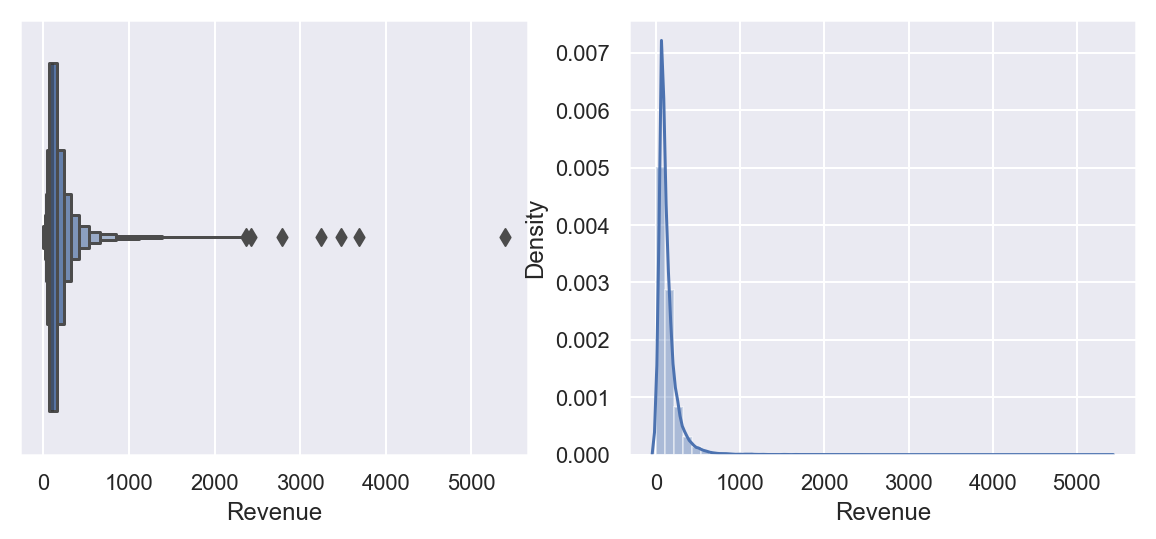

In [ ]:
_, axes = plt.subplots(1, 2, sharey=False,sharex=False, figsize=(10, 4))
sns.boxenplot(df['Revenue'], ax=axes[0])
sns.distplot(df['Revenue'], ax=axes[1])

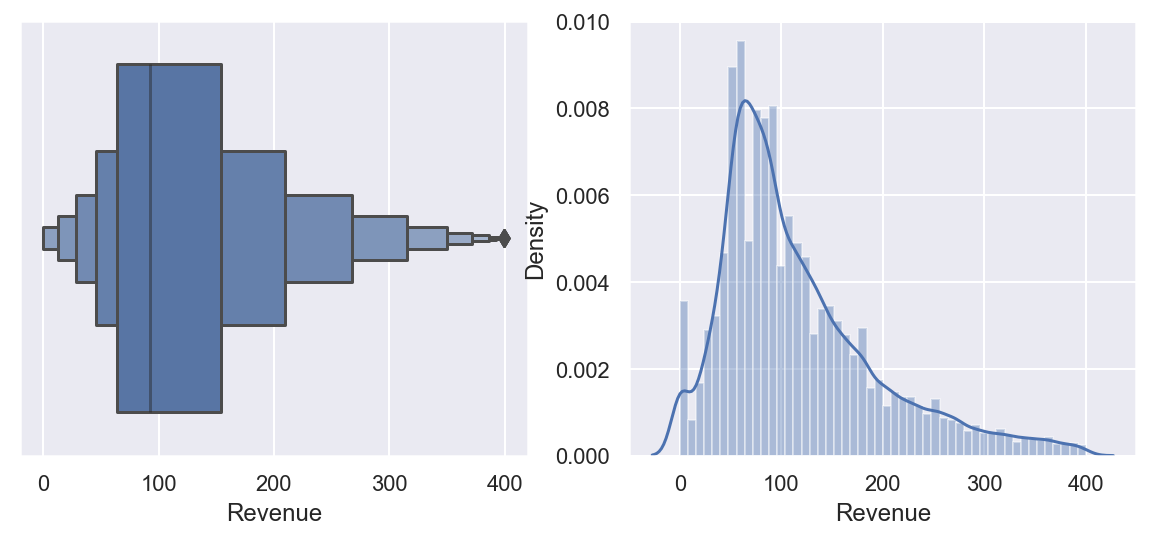

In [ ]:
_, axes = plt.subplots(1, 2, sharey=False,sharex=False, figsize=(10, 4))
sns.boxenplot(df[df.Revenue<400]['Revenue'], ax=axes[0])
sns.distplot(df[df.Revenue<400]['Revenue'], ax=axes[1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012F8A8E97B8>,
      dtype=object)

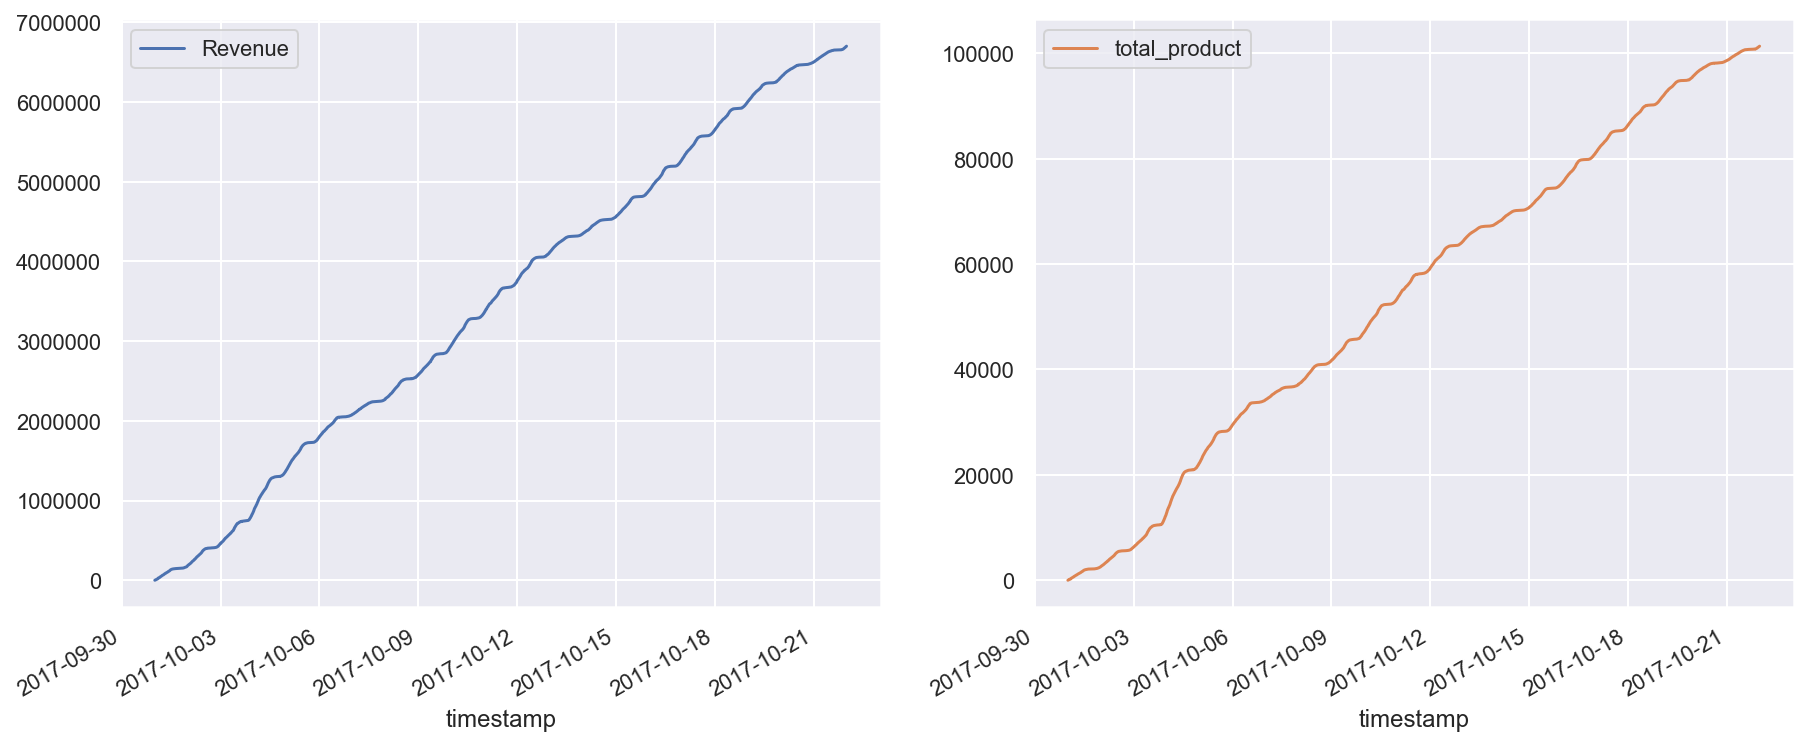

In [ ]:
df[['Revenue','total_product']].cumsum().plot( subplots=True, layout=(1, 2),sharex=True,figsize=(15, 6))

## Total Unique Product / Total Product Distribution

C:\Users\Wasim\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Wasim\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


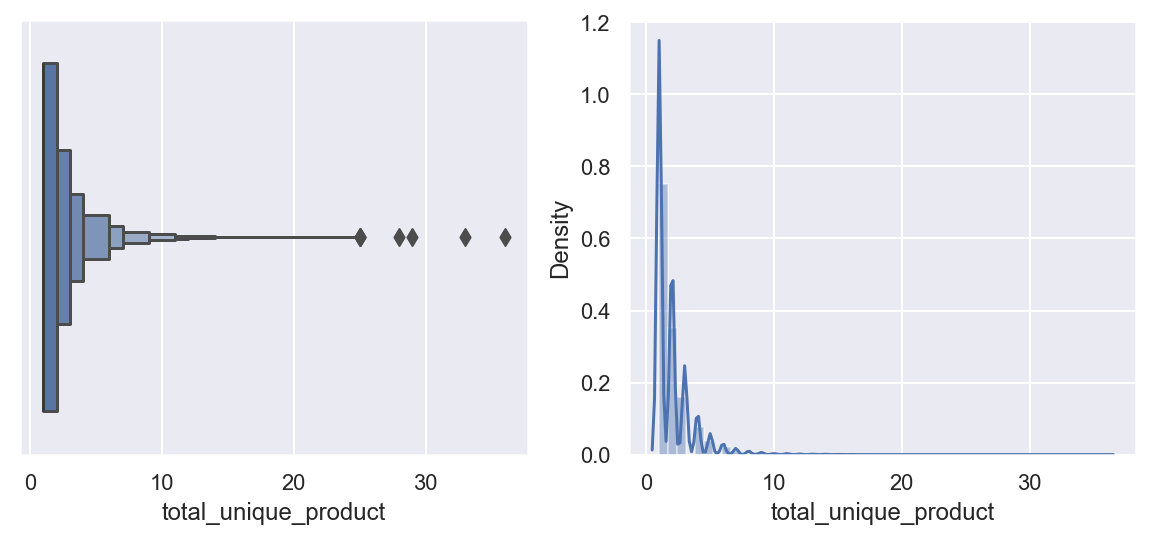

In [ ]:
_, axes = plt.subplots(1, 2, sharey=False,sharex=False, figsize=(10, 4))
sns.boxenplot(df['total_unique_product'], ax=axes[0])
sns.distplot(df['total_unique_product'], ax=axes[1])

Text(0,0.5,'Cumulative total product')

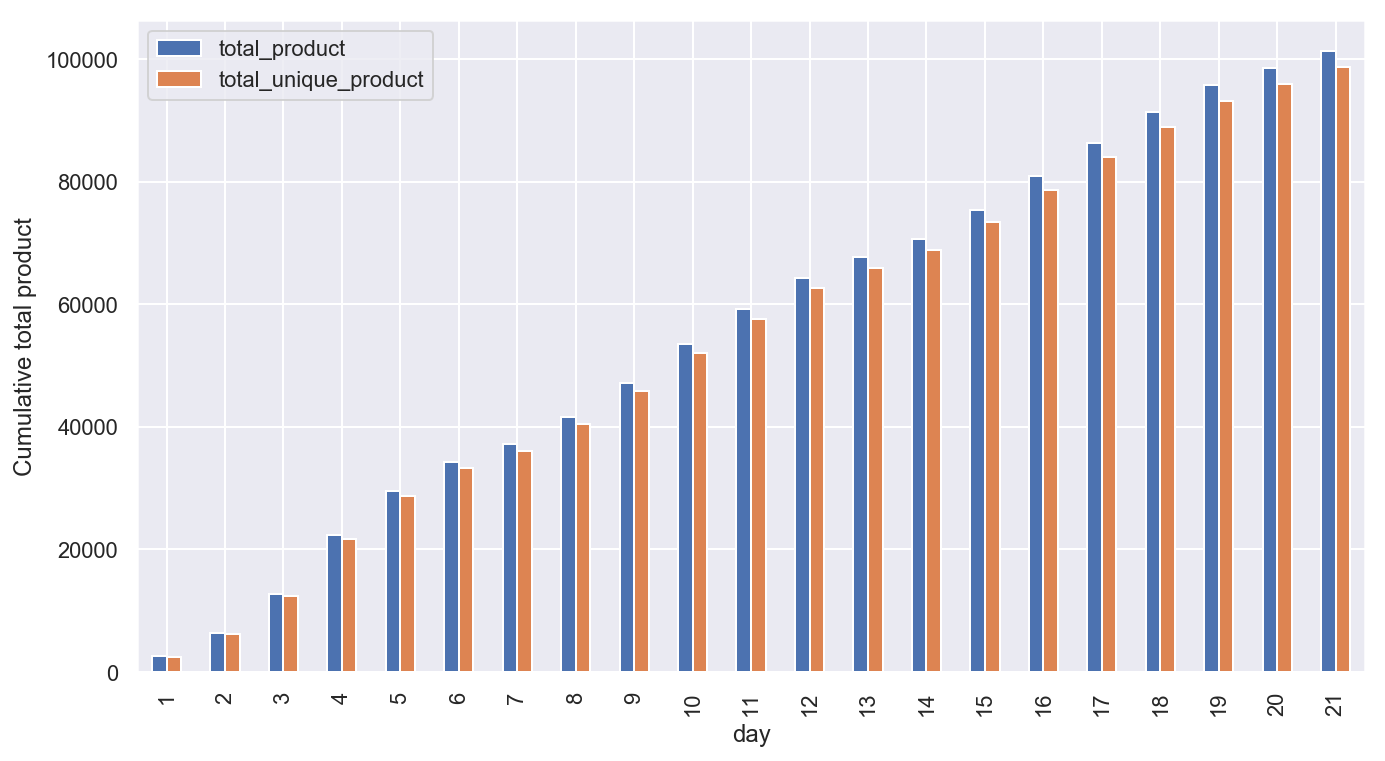

In [ ]:
ax=df.groupby('day')[['total_product','total_unique_product']].sum().cumsum().plot(kind='bar',figsize=(11,6))
ax.set_ylabel('Cumulative total product')

# Revenue Distribution based upon time

In [ ]:
df.loc[:,'day']=df.timestamp.apply(lambda x : x.day)
df.loc[:,'week']=df.timestamp.apply(lambda x : x.week)
df.loc[:,'dayofweek']=df.timestamp.apply(lambda x : x.dayofweek)
df.loc[:,'time_of_day']=df.timestamp.apply(lambda x : x.hour)

## day

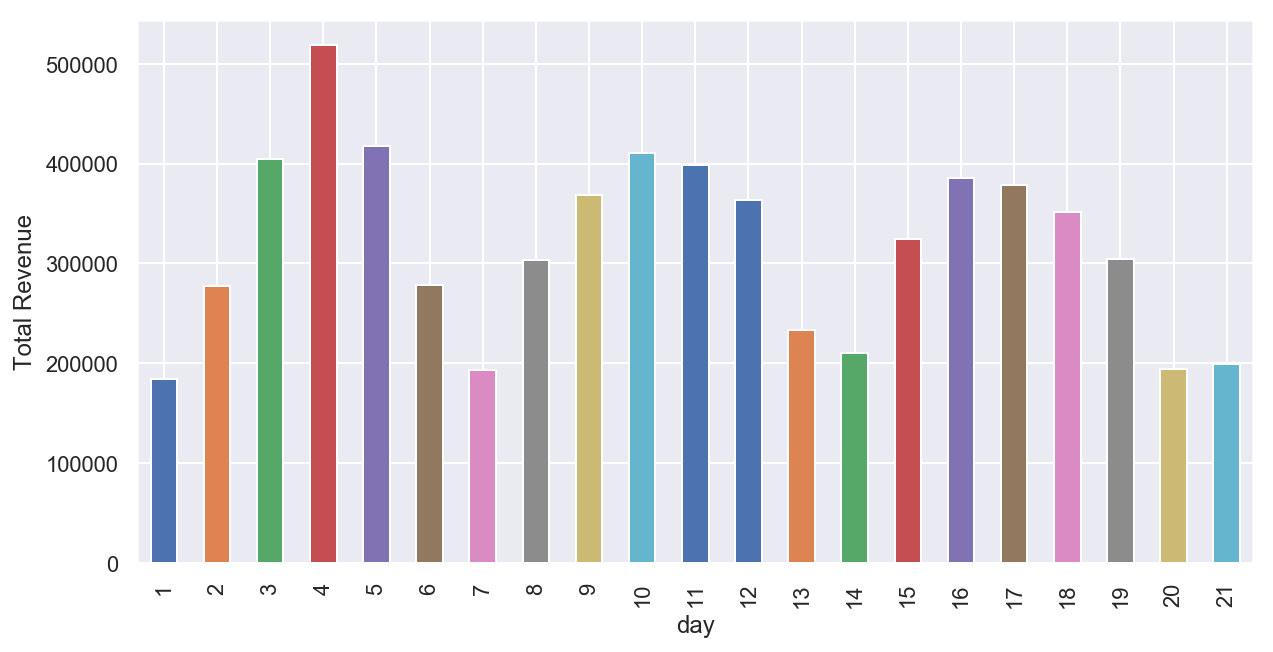

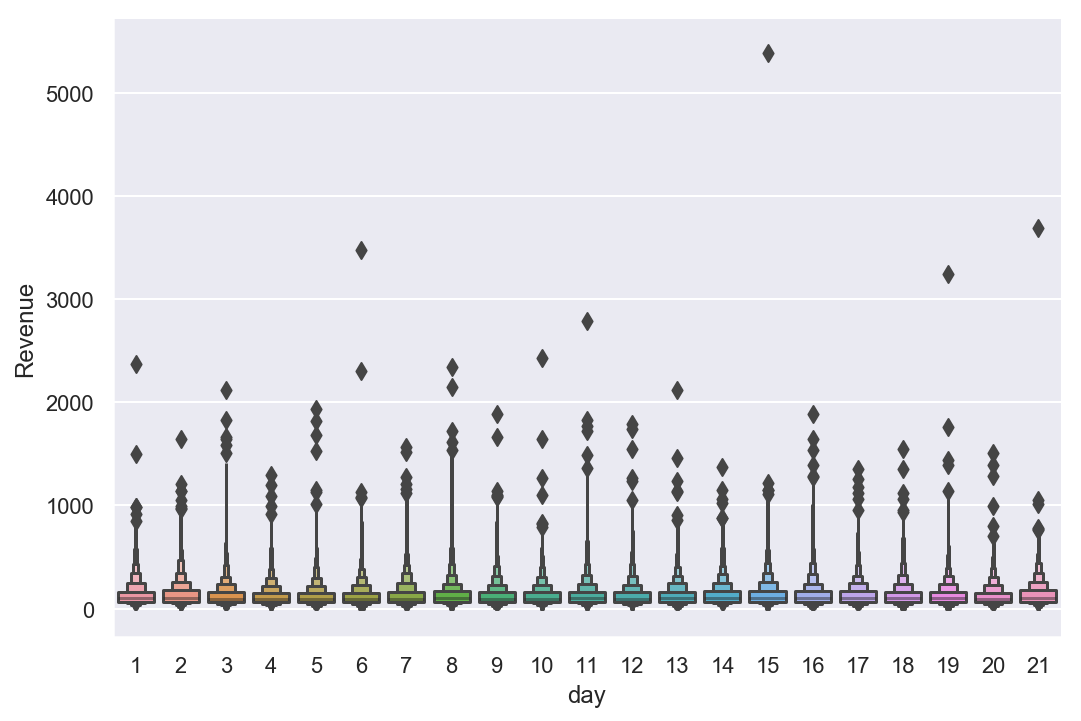

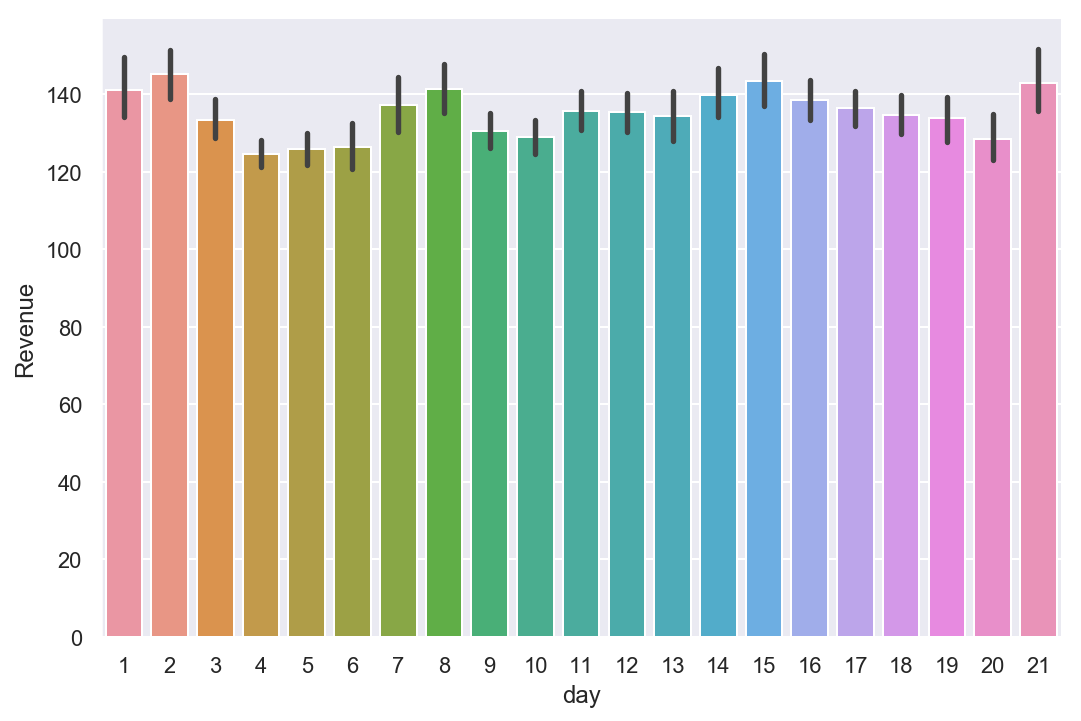

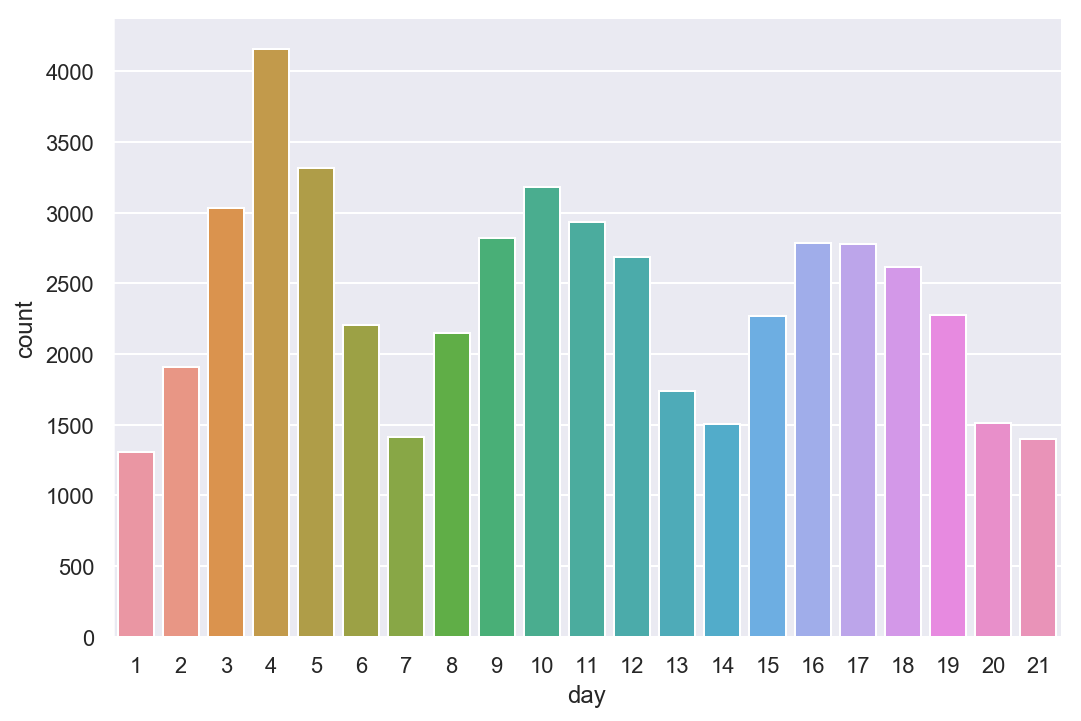

In [ ]:
ax=df.groupby('day')['Revenue'].sum().plot(kind='bar',figsize=(10,5))
ax.set_ylabel('Total Revenue')
sns.catplot(x='day',y='Revenue',kind='boxen',data=df,height=5,aspect=1.5)
sns.catplot(x='day',y='Revenue',kind='bar',data=df,height=5,aspect=1.5)
sns.catplot(x='day',kind='count',data=df,height=5,aspect=1.5)

## Dayofweek

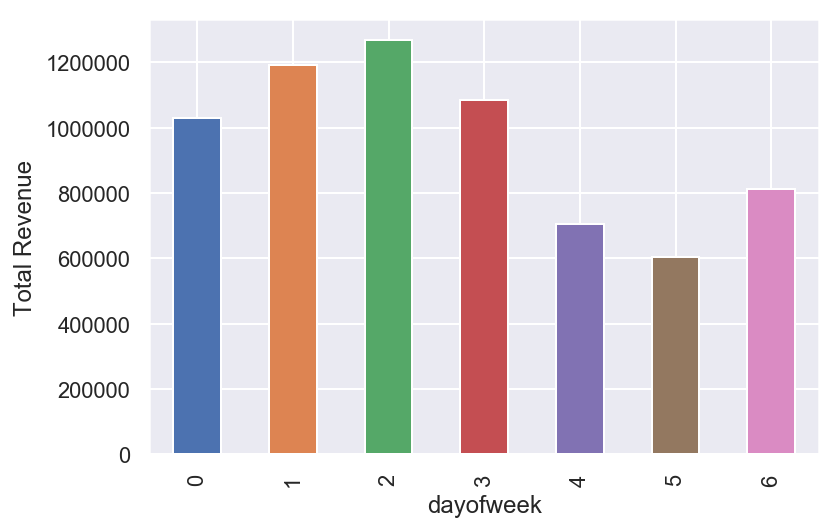

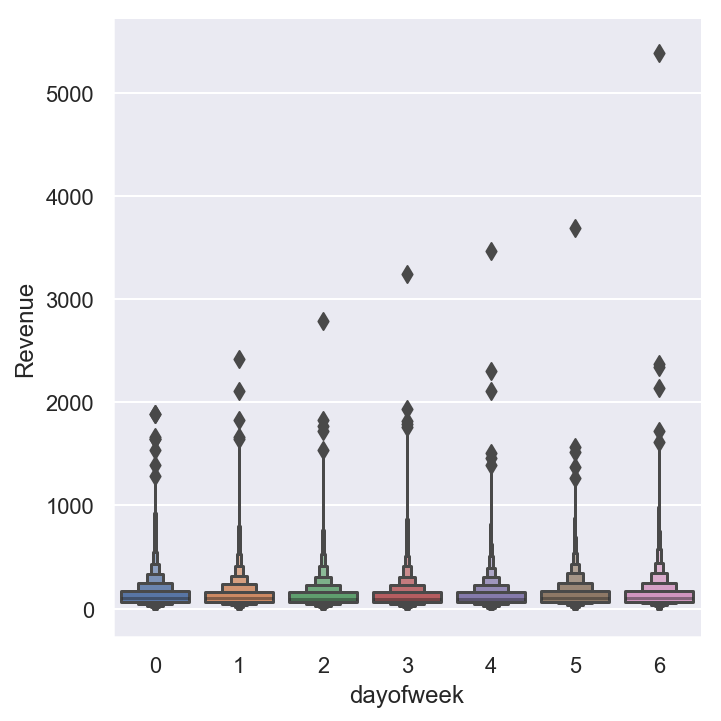

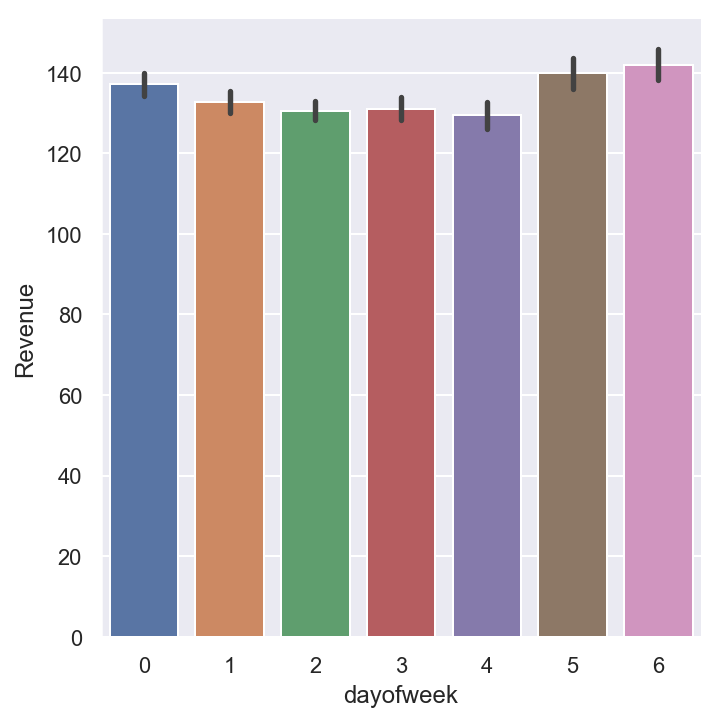

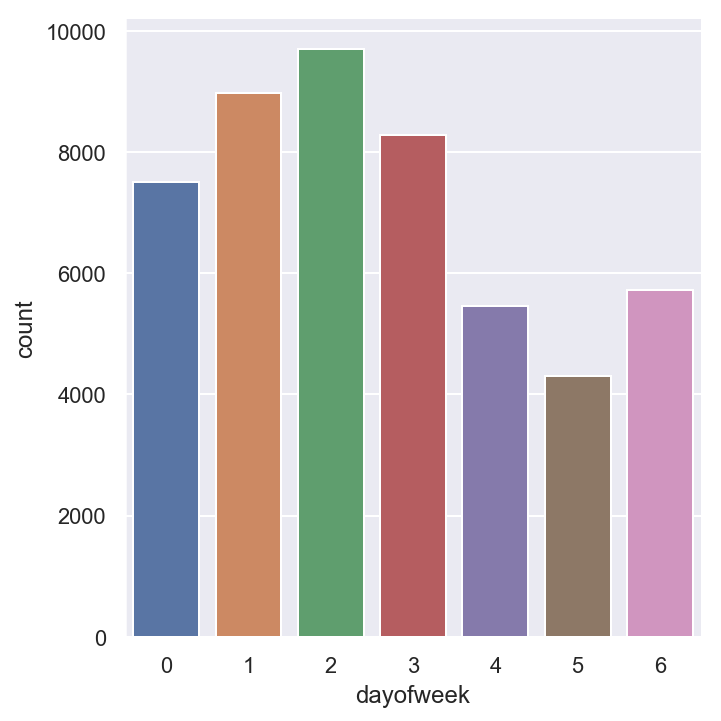

In [ ]:
# Pandas Timestamp.dayofweek attribute return the value of day of the week in the given Timestamp object. 
# The days are numbered from 0 to 6 where 0 is Monday and 6 is Sunday.
ax=df.groupby('dayofweek')['Revenue'].sum().plot(kind='bar')
ax.set_ylabel('Total Revenue')
sns.catplot(x='dayofweek',y='Revenue',kind='boxen',data=df)
sns.catplot(x='dayofweek',y='Revenue',kind='bar',data=df)
sns.catplot(x='dayofweek',kind='count',data=df)

## time of day

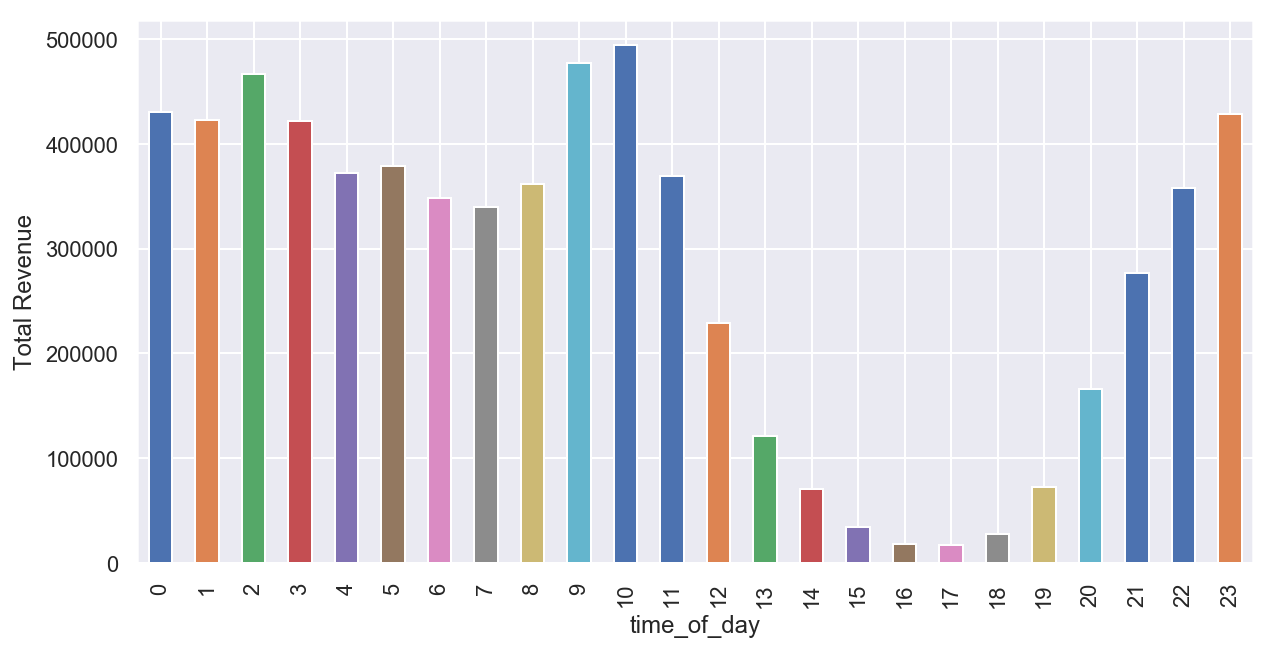

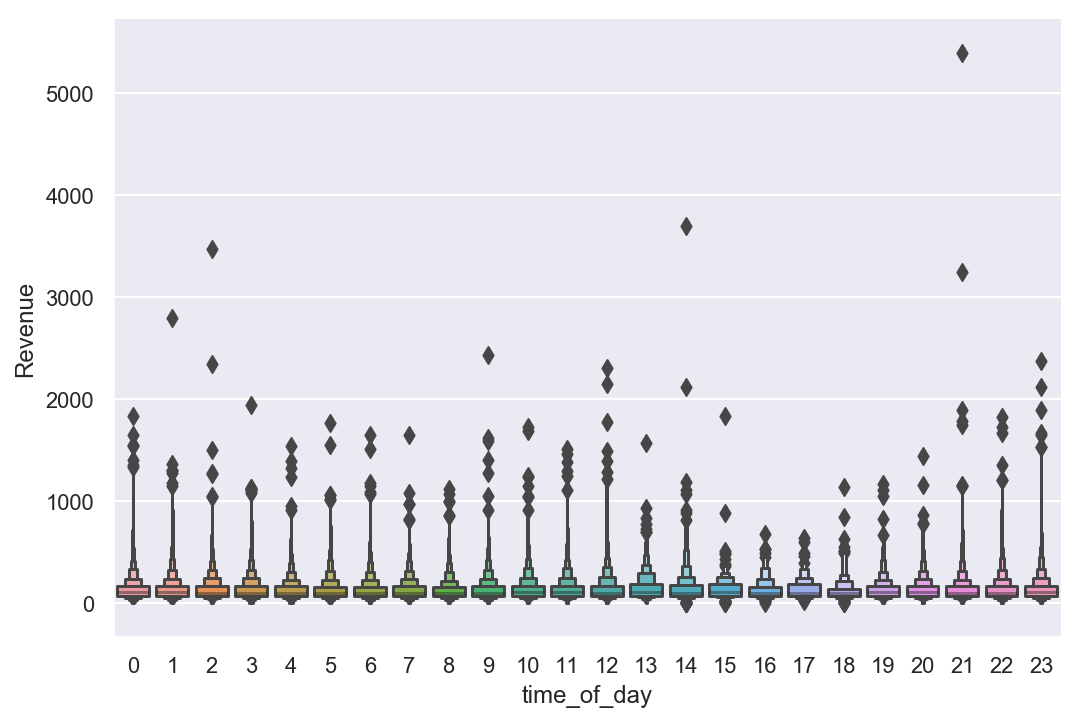

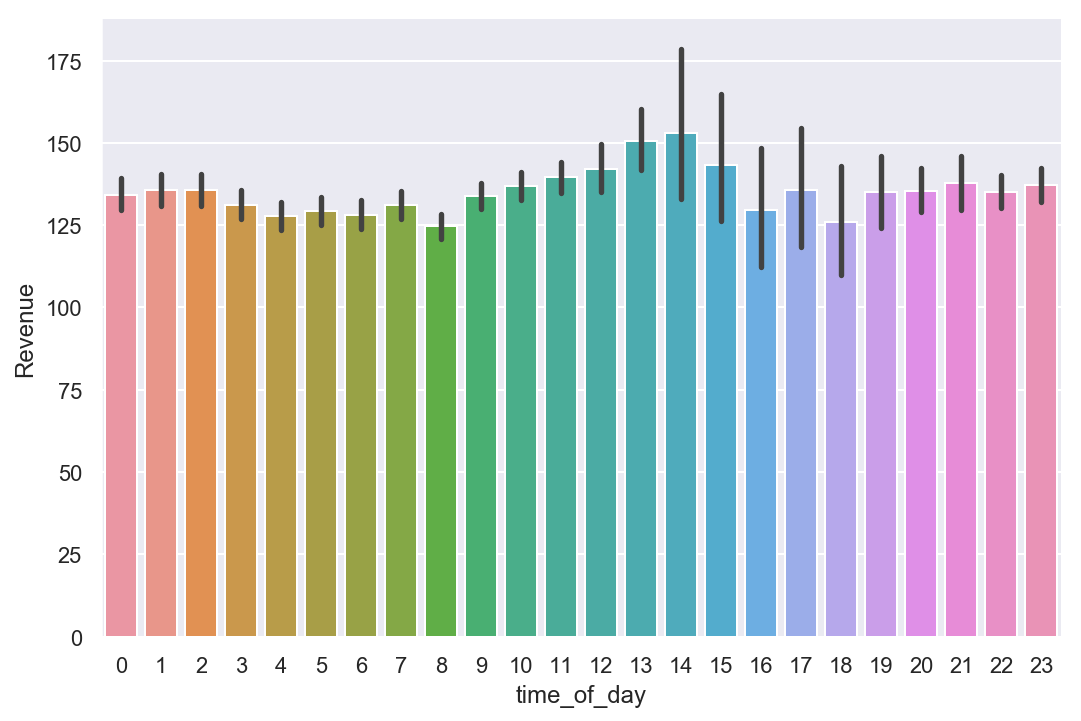

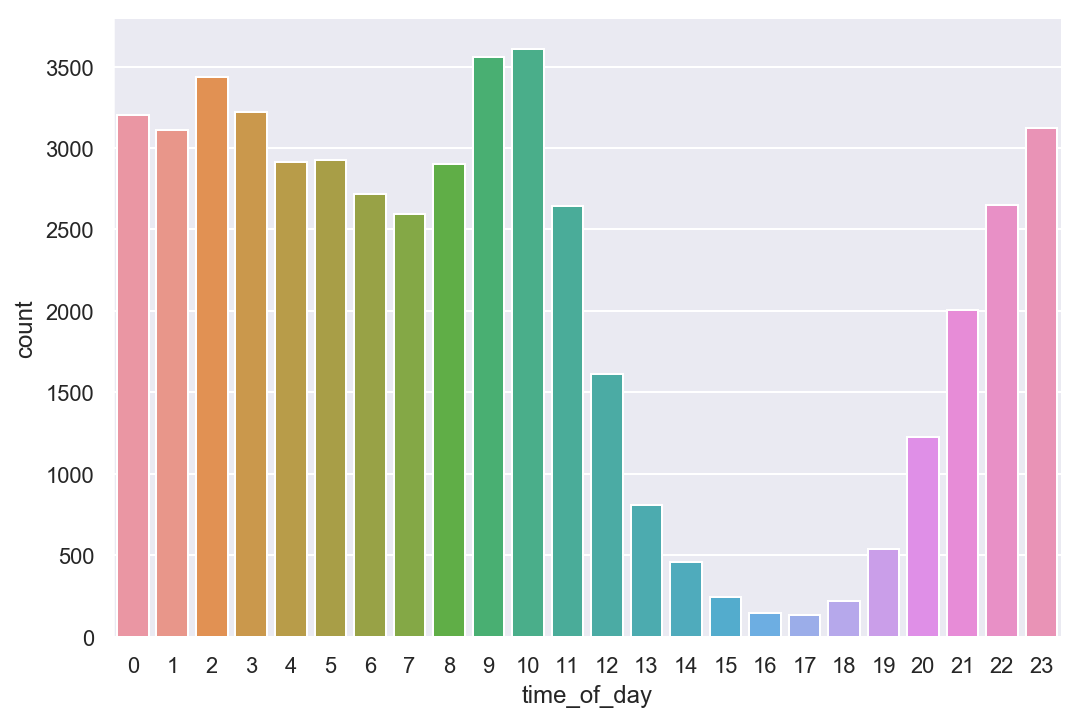

In [ ]:
ax=df.groupby('time_of_day')['Revenue'].sum().plot(kind='bar',figsize=(10,5))
ax.set_ylabel('Total Revenue')
sns.catplot(x='time_of_day',y='Revenue',kind='boxen',data=df,height=5,aspect=1.5)
sns.catplot(x='time_of_day',y='Revenue',kind='bar',data=df,height=5,aspect=1.5)
sns.catplot(x='time_of_day',kind='count',data=df,height=5,aspect=1.5)

## Country

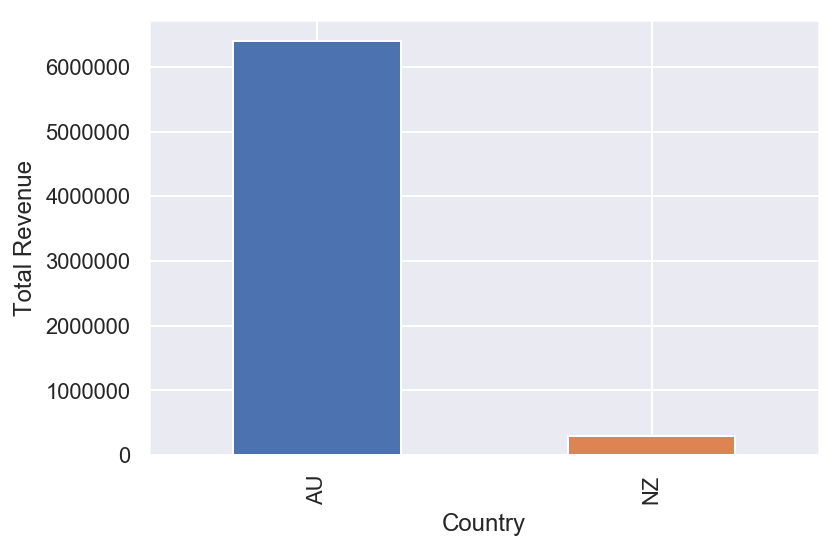

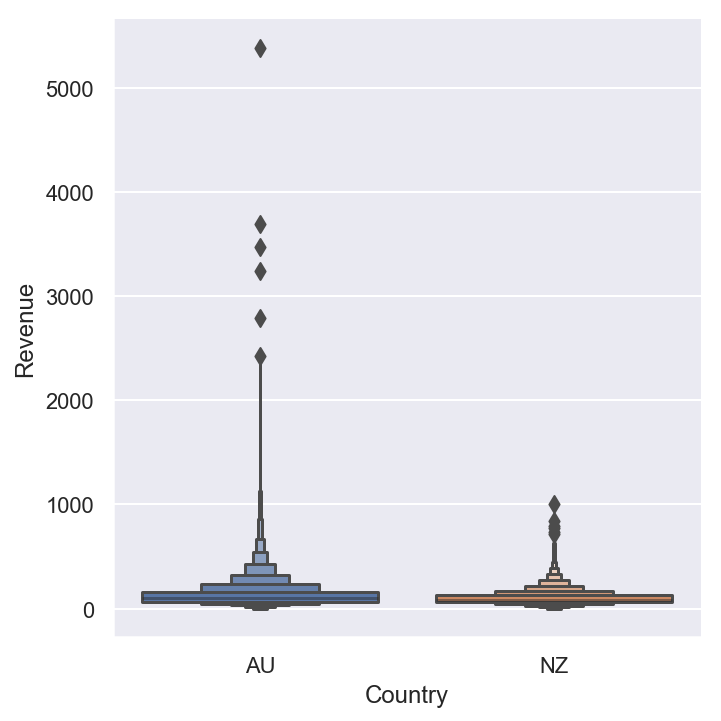

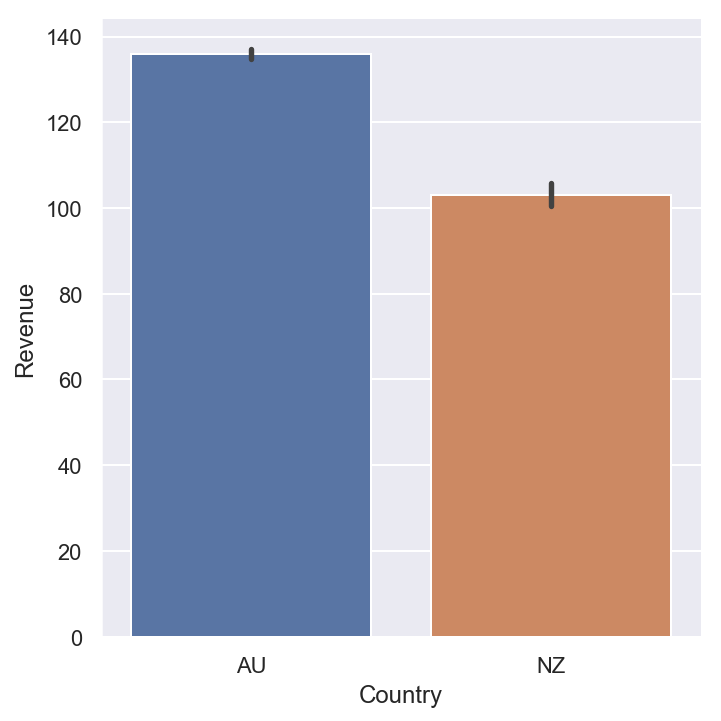

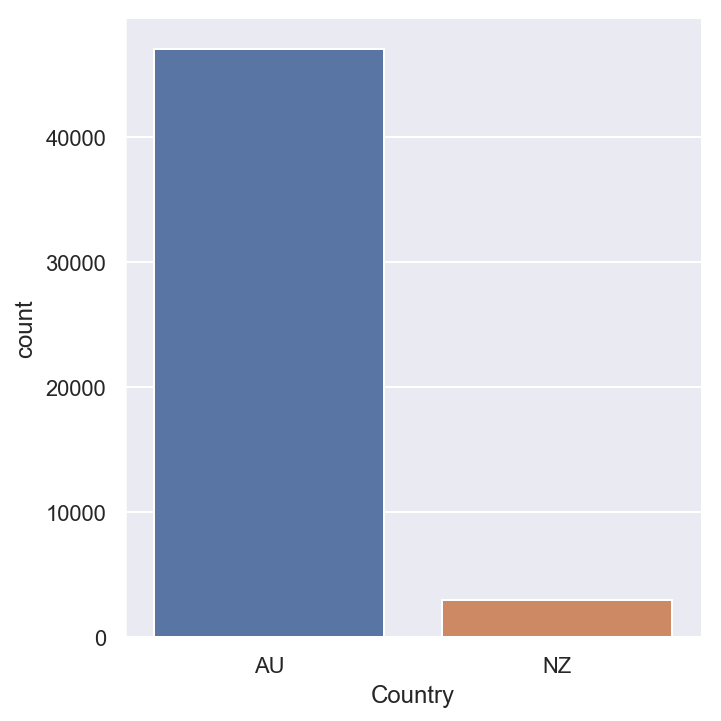

In [ ]:
ax=df.groupby('Country')['Revenue'].sum().plot(kind='bar')
ax.set_ylabel('Total Revenue')
sns.catplot(x='Country',y='Revenue',kind='boxen',data=df)
sns.catplot(x='Country',y='Revenue',kind='bar',data=df)
sns.catplot(x='Country',kind='count',data=df)

## Payment Type

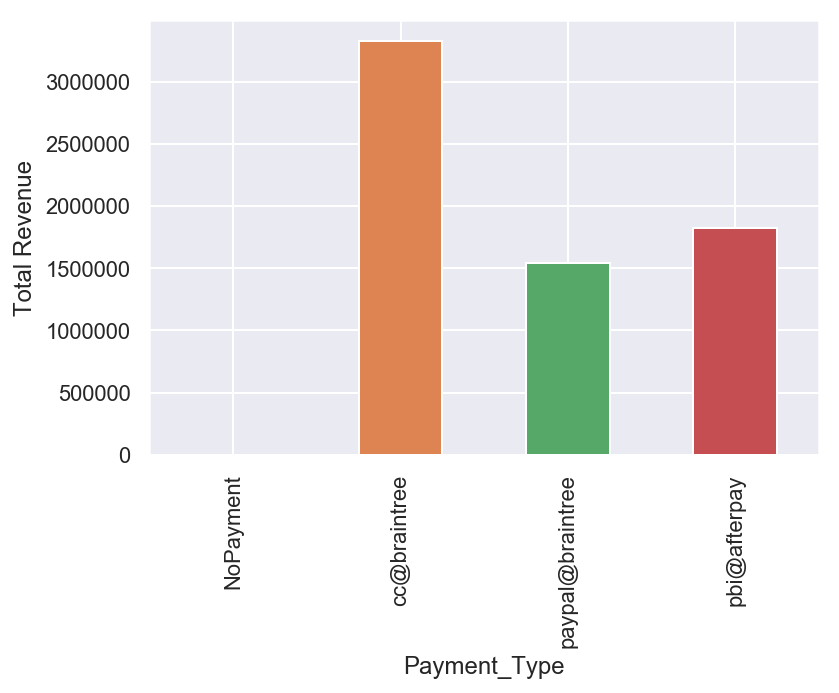

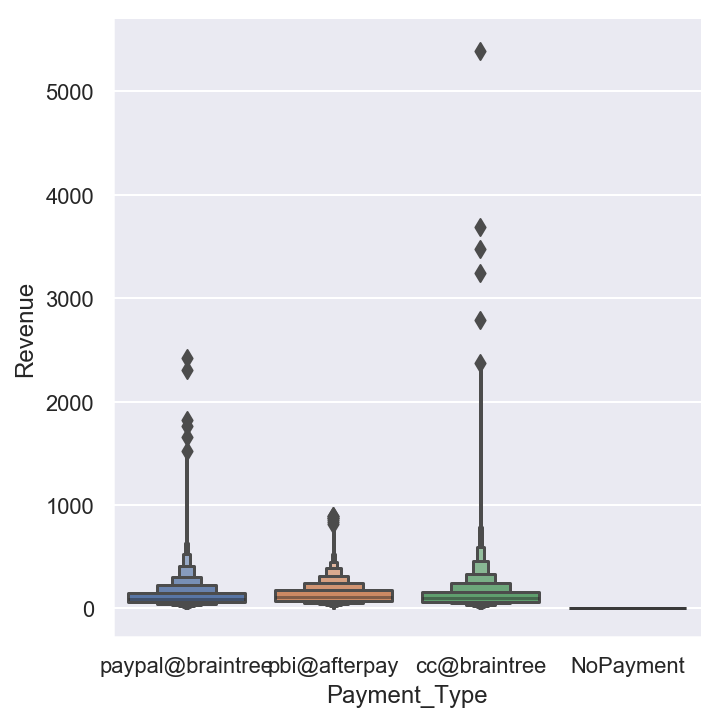

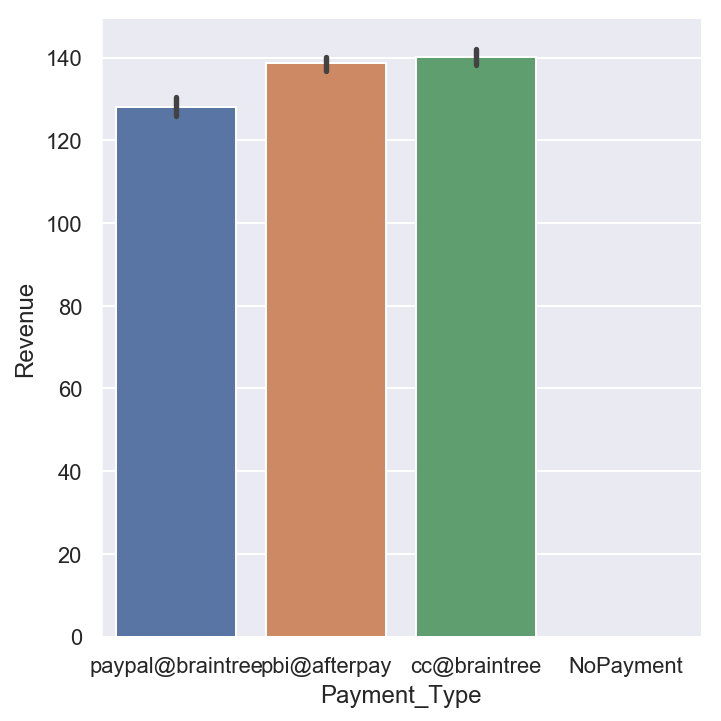

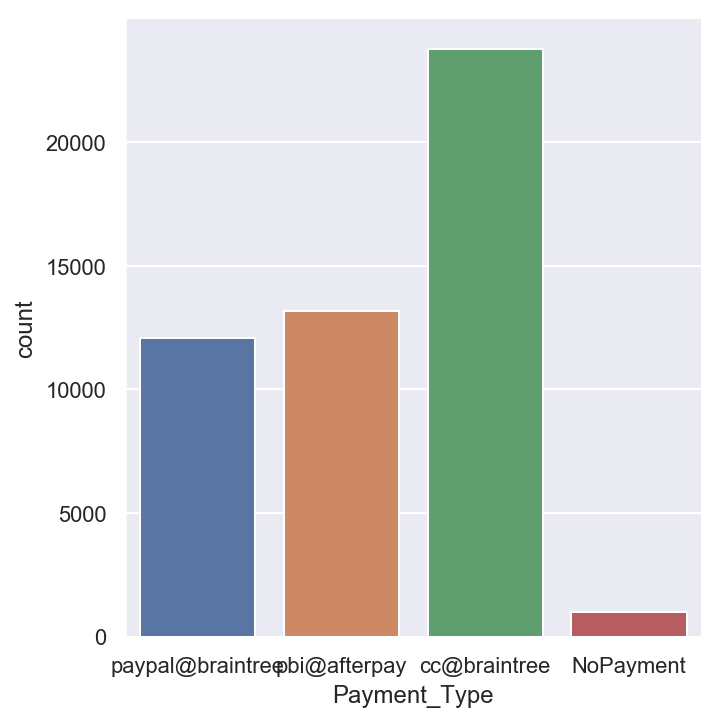

In [ ]:
ax=df.groupby('Payment_Type')['Revenue'].sum().plot(kind='bar')
ax.set_ylabel('Total Revenue')
sns.catplot(x='Payment_Type',y='Revenue',kind='boxen',data=df)
sns.catplot(x='Payment_Type',y='Revenue',kind='bar',data=df)
sns.catplot(x='Payment_Type',kind='count',data=df)

# Single/Multiple Purchasers

In [ ]:
multiple_purchaser=df.groupby('ip_address')['timestamp'].count().sort_values(ascending=False).reset_index()
multiple_purchaser.columns=['ip_address','count']
multiple_purchaser=multiple_purchaser.loc[(multiple_purchaser['count']>1),]
multiple_purchaser

ip_address  count
0       49.255.235.25    202
1        210.5.112.34    104
2      180.232.79.218     40
3     108.171.134.165     39
4        203.11.225.5     35
5      134.159.131.34     34
6       203.160.3.134     26
7      175.103.23.242     24
8       168.140.181.4     24
9       116.50.58.180     23
10      203.27.183.10     22
11       203.28.166.2     22
12    108.171.134.160     21
13    108.171.134.189     20
14     165.142.249.81     19
15      175.45.116.89     18
16     117.120.18.136     16
17      175.45.116.66     16
18      203.1.107.254     16
19     175.45.116.100     15
20     117.120.16.139     15
21     101.181.90.165     15
22      203.10.43.236     15
23       203.1.252.35     14
24       165.86.81.71     14
25      203.208.111.8     14
26     175.45.116.104     14
27     117.120.16.134     13
28      203.2.218.131     13
29     117.120.16.131     13
...               ...    ...
4830   121.210.184.86      2
4831  115.188.143.248      2
4832   210.185.127.22      2
4833   119.225.66.226      2
4834  123.243.200.251      2
4835    58.179.103.58      2
4836   125.214.90.194      2
4837    58.179.107.86      2
4838   210.185.127.90      2
4839     121.209.12.7      2
4840    155.143.5.110      2
4841     1.144.97.108      2
4842    210.10.210.38      2
4843    59.102.69.201      2
4844    115.188.78.83      2
4845    120.18.29.248      2
4846  121.208.227.223      2
4847     103.52.1.194      2
4848    123.243.33.92      2
4849     119.18.38.19      2
4850    130.220.181.6      2
4851       1.42.61.49      2
4852     1.144.97.138      2
4853   203.213.230.33      2
4854   155.143.42.152      2
4855     1.144.97.137      2
4856   123.211.128.17      2
4857   103.233.132.86      2
4858     1.144.97.132      2
4859   123.243.32.154      2

[4860 rows x 2 columns]

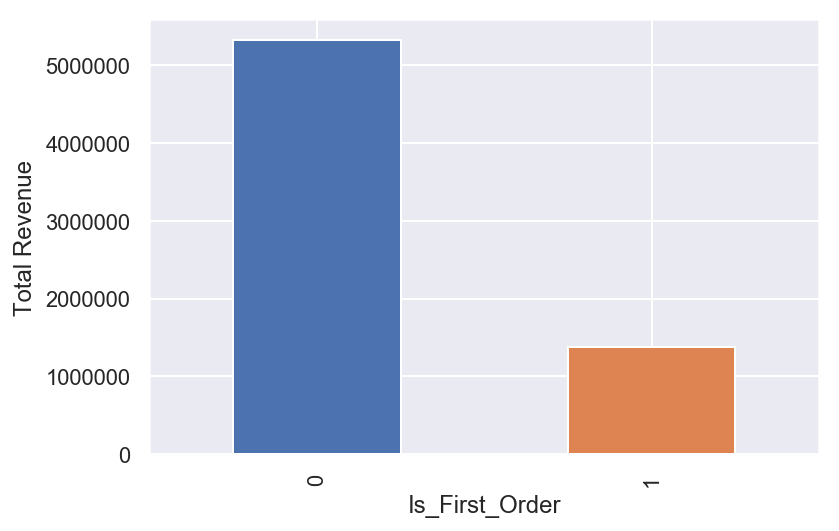

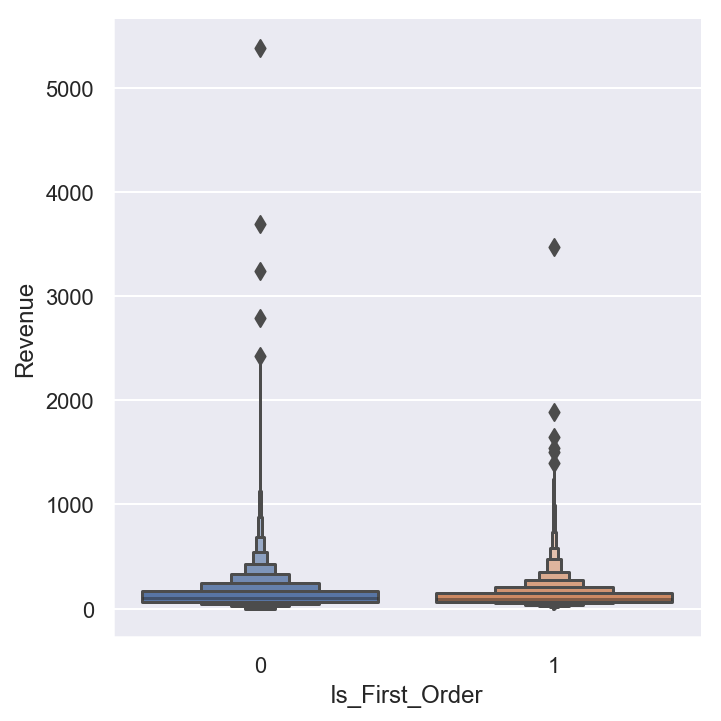

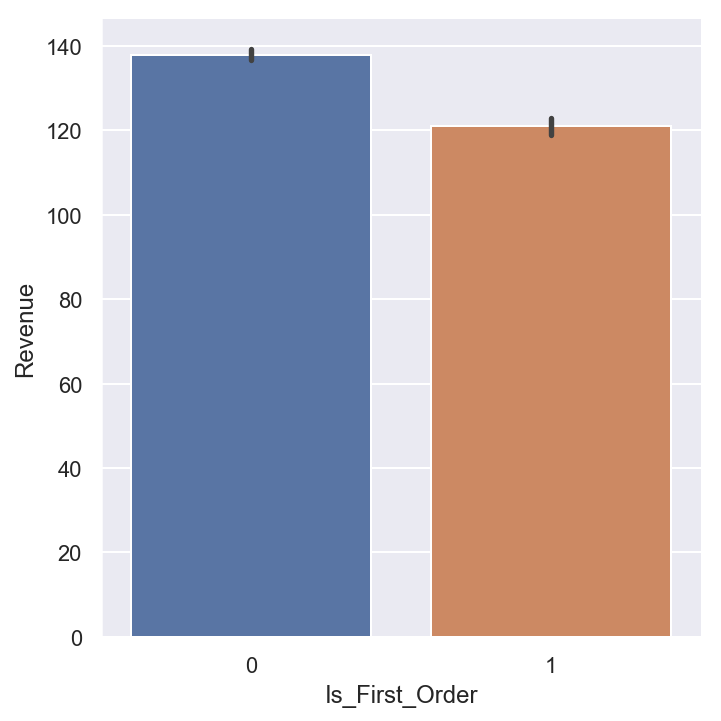

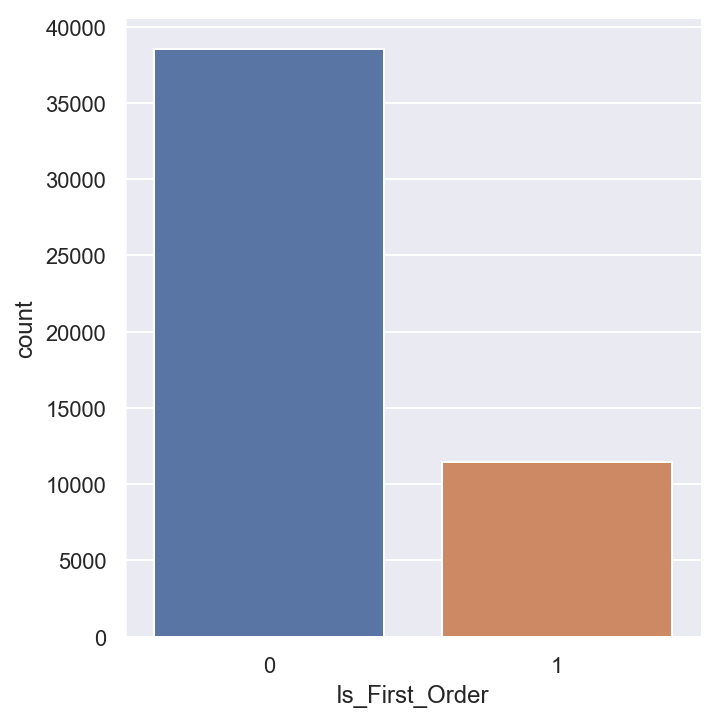

In [ ]:
# sns.set_style("whitegrid")
ax=df.groupby('Is_First_Order')['Revenue'].sum().plot(kind='bar')
ax.set_ylabel('Total Revenue')
sns.catplot(x='Is_First_Order',y='Revenue',kind='boxen',data=df)
sns.catplot(x='Is_First_Order',y='Revenue',kind='bar',data=df)
sns.catplot(x='Is_First_Order',kind='count',data=df)

C:\Users\Wasim\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


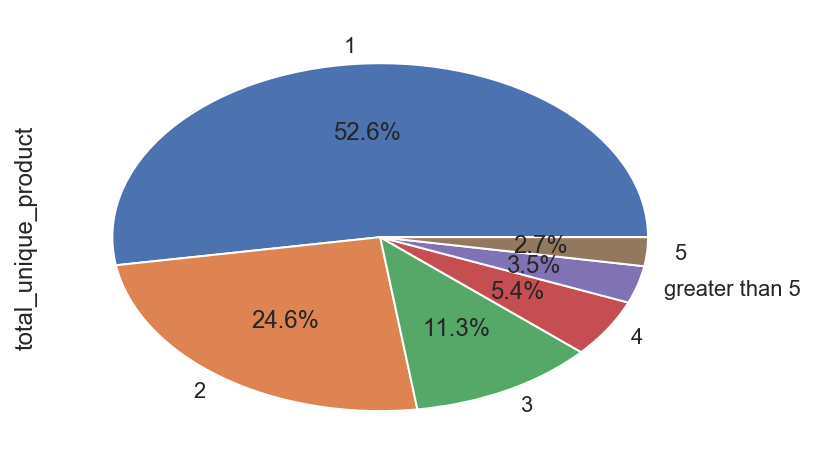

In [ ]:
a=df[['timestamp','total_unique_product']]
a.loc[(a.total_unique_product>5),'total_unique_product']='greater than 5'
a.total_unique_product.value_counts().plot.pie(autopct="%.1f%%");

# 2.	Product Affinity

In [ ]:
def process_product_id(x):
    x=x.split(',')
    x=[id.strip() for id in x]
    x.sort()
    x='|'.join(x)
    return x
def process_product_id_list(x):
    x=x.split(',')
    x=[id.strip() for id in x]
    x.sort()
    return x

In [ ]:
print(f"rows with mismatched product_id and  Number_of_Products : {len(df[(df.total_unique_product_id!=df.total_unique_product)])}")

rows with mismatched product_id and  Number_of_Products : 16


## Product Affinity without including any subset

In [ ]:
#Abstract Groupby for finding product affinity without including subset
df[(df.total_unique_product_id==df.total_unique_product) & (df.total_unique_product>1)].Product_ID.apply(lambda x :process_product_id(x)).value_counts()

rows with mismatched product_id and  Number_of_Products : 16


NI126AA40TEL|NI126AA41TEK                                                                     8
CA221AC27YSE|CA221AC29UPY                                                                     6
ON866AA63CDC|ON866AA65CDA                                                                     5
NI126SA70ZTL|NI126SA78QUZ                                                                     5
ON866AA63CDC|ON866AA64CDB                                                                     5
CA221AC27UQA|CA221AC29UPY                                                                     4
LY151AA05YNM|LY151AA23YMU                                                                     4
AT049AA65FBY|AT049AA68FBV                                                                     4
AD660SH71MVS|AD660SH72MVR                                                                     4
DO896AA47NGI|DO896AA48NGH                                                                     4
JE811AA48XFV|JE811AA49XFU               

## Product Affinity including all subset

In [ ]:
def create_dict(id,name):
    name=name.split(',')
    name=[n.strip() for n in name]
    id=id.split(',')
    id=[i.strip() for i in id]
    return {i:n for i,n in zip(id,name)}
create_dict('SK173SF76ADR,SP869SH55UNK','Go Step Lite - Origin,Lorne Sandals')

In [ ]:
def get_product_name(id):
    try : return name_id_dict[id]
    except KeyError as e: return df[df.Product_ID==id].Product_Name.iloc[0]
    except : return 'NaN'
    
def get_product_name_list(id_list):
    id_list=id_list.split('|')
    product_list=[get_product_name(id) for id in id_list]
    return ' | '.join(product_list)
get_product_name_list('CA221AC74ILD|CA221AC77ILA')

### Creating key(product_id) value(product_name) dictionary

In [ ]:
name_id_dict_list=df[(df.total_unique_product_id==df.total_unique_product_name) & (df.total_unique_product>1)][['Product_Name','Product_ID']].apply(lambda x : create_dict(x.Product_ID,x.Product_Name),axis=1).values
name_id_dict={}
for item in name_id_dict_list:
    name_id_dict.update(item)

In [ ]:
product_id_list=df[(df.total_unique_product_id==df.total_unique_product) & (df.total_unique_product>1)].Product_ID.apply(lambda x :process_product_id_list(x)).values

In [ ]:
len(product_id_list),len(name_id_dict)

(23684, 21312)

In [ ]:
df.Product_Name[1]
def generateSubsequences(arr, index, subarr): 
        
    # Print the subsequence when reach  
    # the leaf of recursion tree 
    if index == len(arr): 
            
        # Condition to avoid printing 
        # empty subsequence 
        if len(subarr) > 1 and len(subarr) < len(arr):
            x='|'.join(subarr)
            subseq.append(x) 
        
    else: 
        # Subsequence without including  
        # the element at current index 
        generateSubsequences(arr, index + 1, subarr) 
            
        # Subsequence including the element 
        # at current index 
        generateSubsequences(arr, index + 1,  
                            subarr+[arr[index]]) 
        
    return
subseq=[]           
arr =product_id_list[0]    
generateSubsequences(arr, 0, [])

In [ ]:
%%time
from tqdm import tqdm
ids_dict={}
for ids in tqdm(product_id_list):
    subseq=[] 
    generateSubsequences(ids, 0, [])
    for sub_ids in subseq:
        try: ids_dict[sub_ids]+=1
        except : ids_dict[sub_ids]=1      

100%|███████████████████████████████████| 23684/23684 [00:25<00:00, 944.55it/s]

Wall time: 25.3 s


In [ ]:
%%time
sorted_ids_dict=dict(sorted(ids_dict.items(), key=lambda item: item[1],reverse=True))

Wall time: 6.36 s


### Most likely to sell together products are 
1. bikni varieties 
2. Staple Crew Tee varities
3. 3/4 Tights and Slim Tank
4. Crew Neck T shirt Varities
5. Bikni Top and  High Waisted Briefs 
6. Bikini | Customised Stretch Bralette

In [ ]:
N=50
data=[]
for i,(k,v) in enumerate(sorted_ids_dict.items()):
    if(i<N):
#         print (f"No of time purchased : {v}, product_id :{k}, product_name : {get_product_name_list(k)} ")
        data.append({'product_id':k,'producct_name':get_product_name_list(k),'total_sale':v})
    else:break
product_affinity_df=pd.DataFrame(data=data,columns=['product_id','producct_name','total_sale'])

In [ ]:
product_affinity_df

product_id  \
0                CA221AC74ILD|CA221AC77ILA   
1                ST892AA35REQ|ST892AA36REP   
2                AD776SA19IEU|AD776SA79NRO   
3                LY151AA23YMU|LY151AA50UVL   
4                LY151AA23YMU|LY151AA49UVM   
5                CA221AC77ILA|CA221AC78IKZ   
6                AC054AA96TFB|AC054AA97TFA   
7                AC054AA95TFC|AC054AA97TFA   
8                CA221AC27UQA|CA221AC28UPZ   
9                ST892AA34RER|ST892AA35REQ   
10               AT049AA24JRV|AT049AA30JRP   
11               CA221AC75ILC|CA221AC78IKZ   
12               LY151AA49UVM|LY151AA50UVL   
13               NI126AA40TEL|NI126AA41TEK   
14               AD776SE60HDR|AD776SE61HDQ   
15               ON866AA63CDC|ON866AA65CDA   
16               CA221AC74ILD|CA221AC75ILC   
17               AD660SH07ZLG|AD660SH08ZLF   
18               CA221AC62ILP|CA221AC63ILO   
19               CA221AC26YSF|CA221AC27YSE   
20               ST892AA30REV|ST892AA34RER   
21               CA221AC53CPQ|CA221AC54CPP   
22               AT049AA55GKY|AT049AA56GKX   
23               AS787AA70CDT|AT049AA75WPK   
24               CA221AC26YSF|CA221AC30UPX   
25               CA221AC26YSF|CA221AC28YSD   
26               AC054AA95TFC|AC054AA96TFB   
27               LY151AA05YNM|LY151AA49UVM   
28               NI126SA93VVM|NI126SA94VVL   
29               CA221AC27UQA|CA221AC29UPY   
30               CA221AC27UQA|CA221AC53CPQ   
31               ST892AA30REV|ST892AA35REQ   
32               AT049AA58RIV|AT049AA59RIU   
33               CA221AC65AOS|CA221AC66AOR   
34               SP869SH77EPQ|SP869SH78EPP   
35               ST892AA30REV|ST892AA36REP   
36               AT049AA93MWS|AT049AA94MWR   
37               TE787AA50TMR|TE787AA51TMQ   
38               CA221AC27YSE|CA221AC29UPY   
39               CA221AC28UPZ|CA221AC53CPQ   
40               LY151AA05YNM|LY151AA50UVL   
41  AC054AA95TFC|AC054AA96TFB|AC054AA97TFA   
42               FO571AA03TYA|FO571AA19TXK   
43               AD776SA19IEU|PU462SA20EPJ   
44               CA221AC60ILR|CA221AC61ILQ   
45               CA221AC28UPZ|CA221AC30UPX   
46               AT049AA16JSD|AT049AA18JSB   
47               ST892AA31REU|ST892AA32RET   
48               AT049AA21BPI|AT049AA94FAV   
49               AT049AA06FAJ|AT049AA21BPI   

                                        producct_name  total_sale  
0                                     Bikini | Bikini          12  
1                   Staple Crew Tee | Staple Crew Tee          12  
2      Basic 3/4 Tights | Essentials Linear Slim Tank          11  
3               Crew Neck T-Shirt | Crew-Neck T-Shirt          11  
4               Crew Neck T-Shirt | Crew-Neck T-Shirt          11  
5                Bikini | Customised Stretch Bralette          11  
6           Acad Basic Crew Tee | Acad Basic Crew Tee          10  
7           Acad Basic Crew Tee | Acad Basic Crew Tee          10  
8   Modern Cotton Bikini Briefs | Modern Cotton Bi...          10  
9                   Staple Crew Tee | Staple Crew Tee          10  
10  Belilze Balconette Bikini Top | Dominica High ...           9  
11  Customised Stretch Bralette | Customised Stret...           9  
12              Crew-Neck T-Shirt | Crew-Neck T-Shirt           9  
13  Women's Nike Sportswear Rally Hoodie | Women's...           9  
14  3S Perf Crew Half Cushioned 3PP | 3S Perf Crew...           9  
15    Leco 7/8 Long Cardigan | Leco 7/8 Long Cardigan           8  
16               Bikini | Customised Stretch Bralette           8  
17                  Trefoil Trucker | Trefoil Trucker           8  
18                          Sleek Thong | Sleek Thong           8  
19          Modern Cotton Thong | Modern Cotton Thong           8  
20                  Staple Crew Tee | Staple Crew Tee           8  
21  Modern Cotton Bikini Briefs | Modern Cotton Br...           8  
22                Nora Twisted Top | Nora Twisted Top           7  
23                         World Tee | Good Vibes Tee

# 3. Segmentation of the brand's audience based on Revenue

In [ ]:
df.head()

timestamp  user ID      ip_address  \
timestamp                                                          
2017-10-01 00:00:00 2017-10-01 00:00:00     2888     1.152.111.1   
2017-10-01 00:02:00 2017-10-01 00:02:00    28705    123.2.191.66   
2017-10-01 00:04:00 2017-10-01 00:04:00    20505  122.62.139.174   
2017-10-01 00:06:00 2017-10-01 00:06:00     8896  115.69.166.219   
2017-10-01 00:07:00 2017-10-01 00:07:00     6958   49.180.72.180   

                                                          Product_Name  \
timestamp                                                                
2017-10-01 00:00:00                              Classic Mini Backpack   
2017-10-01 00:02:00  The Perfect Tee,Hotter Than Ever Tee,All-Over ...   
2017-10-01 00:04:00                              Sammy Scallop Hem Top   
2017-10-01 00:06:00                                             Kanken   
2017-10-01 00:07:00                                            Valerie   

                                                            Product_ID  \
timestamp                                                                
2017-10-01 00:00:00                                       AD660AC16AVJ   
2017-10-01 00:02:00  LE893AA31QUE,MI202AA29HAK,AD660AA70ZWF,AT049AA...   
2017-10-01 00:04:00                                       AT049AA68FBV   
2017-10-01 00:06:00                                       FJ806AC13CNU   
2017-10-01 00:07:00                                       MI906SH05HLA   

                     Is_First_Order User_Gender      Payment_Type  \
timestamp                                                           
2017-10-01 00:00:00               1      female  paypal@braintree   
2017-10-01 00:02:00               0      female      pbi@afterpay   
2017-10-01 00:04:00               0        male      cc@braintree   
2017-10-01 00:06:00               0      female      cc@braintree   
2017-10-01 00:07:00               0      female  paypal@braintree   

                    Number_of_Products Order_Coupon_Code       ...        \
timestamp                                                      ...         
2017-10-01 00:00:00                  1        nlsskf2TXu       ...         
2017-10-01 00:02:00            1,1,1,1               NaN       ...         
2017-10-01 00:04:00                  1               NaN       ...         
2017-10-01 00:06:00                  1               NaN       ...         
2017-10-01 00:07:00                  1               NaN       ...         

                        Revenue total_product total_unique_product  \
timestamp                                                            
2017-10-01 00:00:00   45.450001             1                    1   
2017-10-01 00:02:00  168.070007             4                    4   
2017-10-01 00:04:00   54.500000             1                    1   
2017-10-01 00:06:00  118.139999             1                    1   
2017-10-01 00:07:00  140.000000             1                    1   

                    total_unique_product_id  day  week  dayofweek  \
timestamp                                                           
2017-10-01 00:00:00                       1    1    39          6   
2017-10-01 00:02:00                       4    1    39          6   
2017-10-01 00:04:00                       1    1    39          6   
2017-10-01 00:06:00                       1    1    39          6   
2017-10-01 00:07:00                       1    1    39          6   

                     time_of_day  total_unique_product_name  is_used_coupon  
timestamp                                                                    
2017-10-01 00:00:00            0                          1             1.0  
2017-10-01 00:02:00            0                          4             0.0  
2017-10-01 00:04:00            0                          1             0.0  
2017-10-01 00:06:00            0                          1             0.0  
2017-10-01 00:07:00            0                       

In [ ]:
df.loc[df.Order_Coupon_Code.isnull(),'is_used_coupon']=0
df['is_used_coupon']=df['is_used_coupon'].fillna(1)

## Distribution by gender

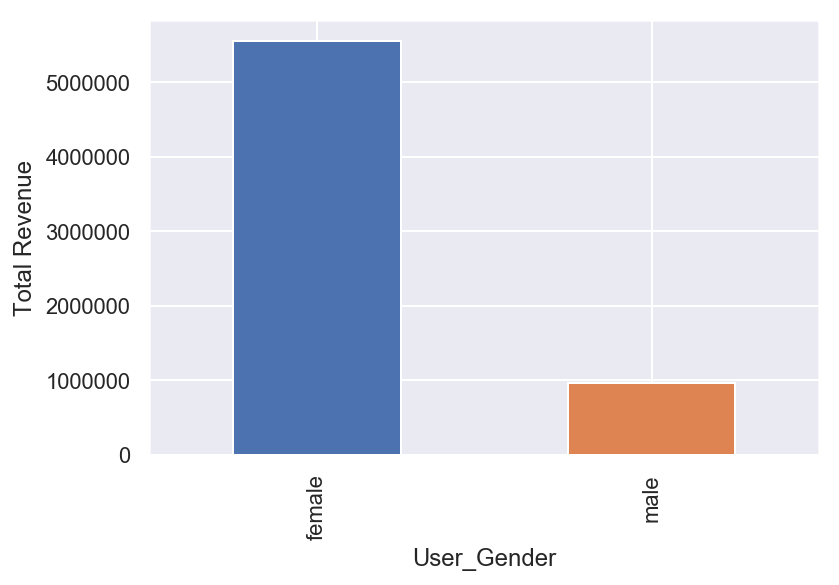

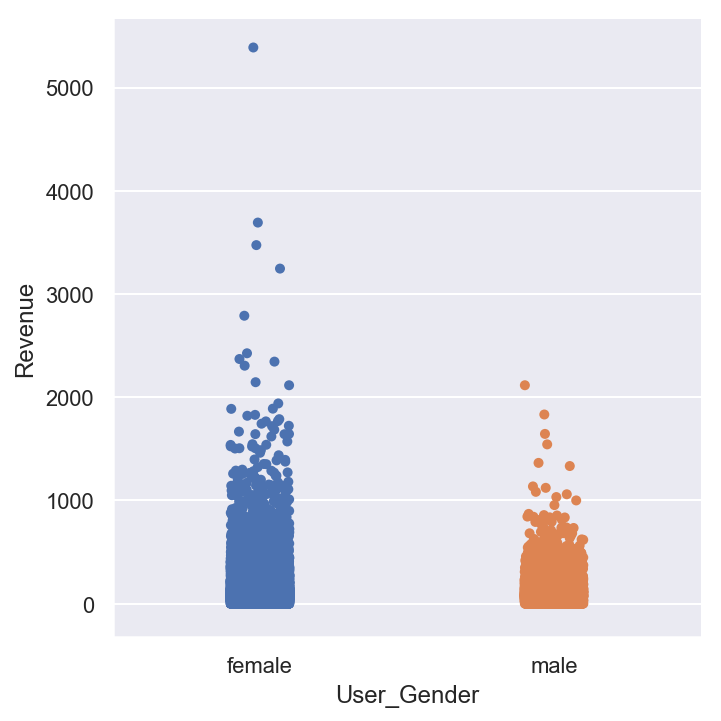

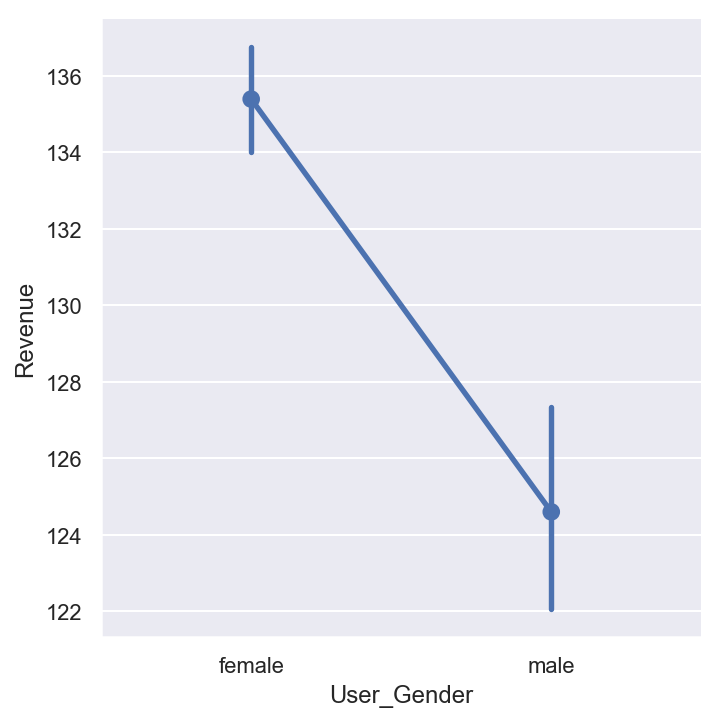

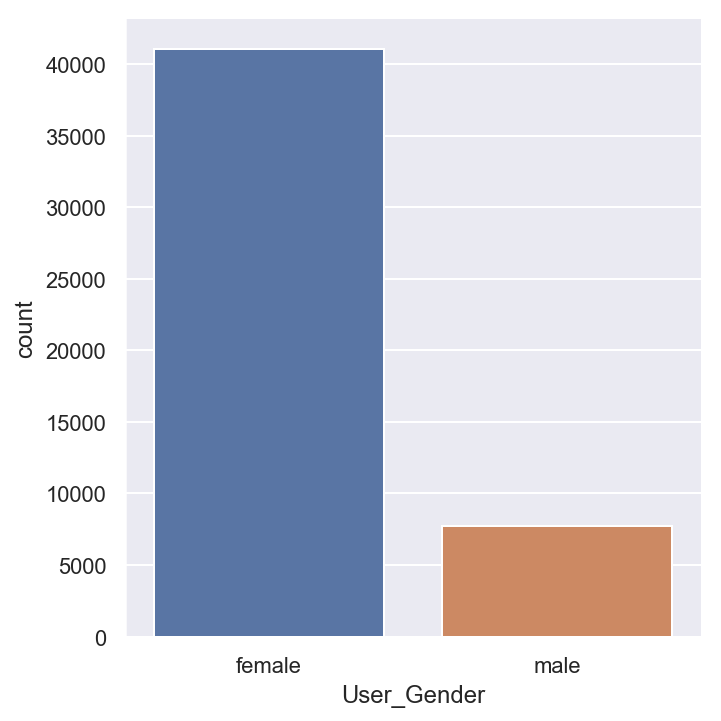

In [ ]:
# sns.set_style("whitegrid")
ax=df.groupby('User_Gender')['Revenue'].sum().plot(kind='bar')
ax.set_ylabel('Total Revenue')
sns.catplot(x='User_Gender',y='Revenue',kind='strip',data=df)
sns.catplot(x='User_Gender',y='Revenue',kind='point',data=df)
sns.catplot(x='User_Gender',kind='count',data=df)

## Distribtion by gender and is_used_coupon
1. Female have used more coupon than male and on high revenue

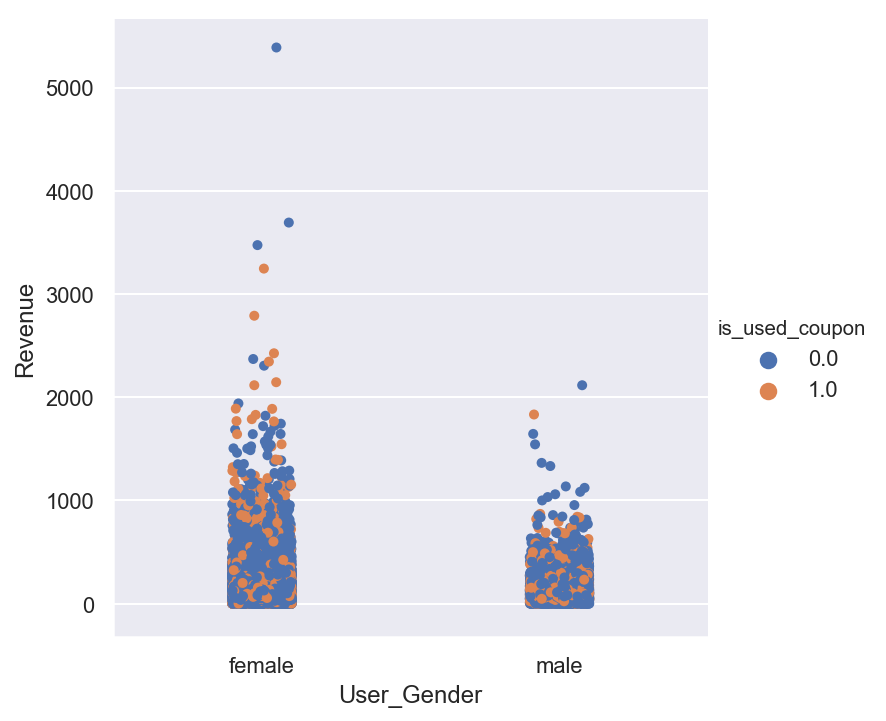

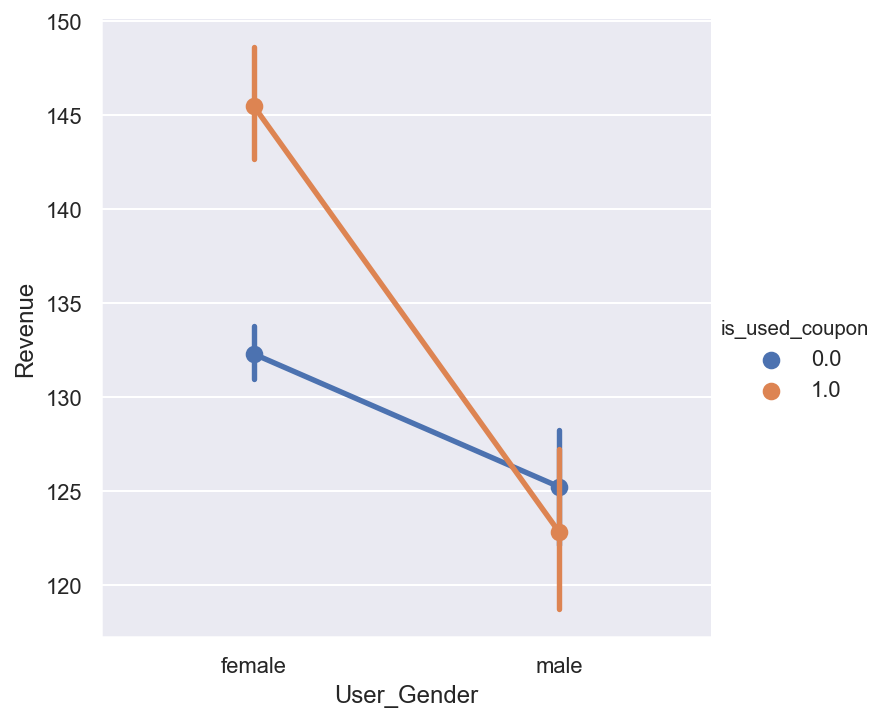

In [ ]:
sns.catplot(x='User_Gender',y='Revenue',hue='is_used_coupon',kind='strip',data=df)
sns.catplot(x='User_Gender',y='Revenue',hue='is_used_coupon',kind='point',data=df)

## Distribution by is_first_order and is_used_coupon
1. In Frst order  almost 50% transaction is used by coupon.
So new consumer can be targetted more by giving coupon

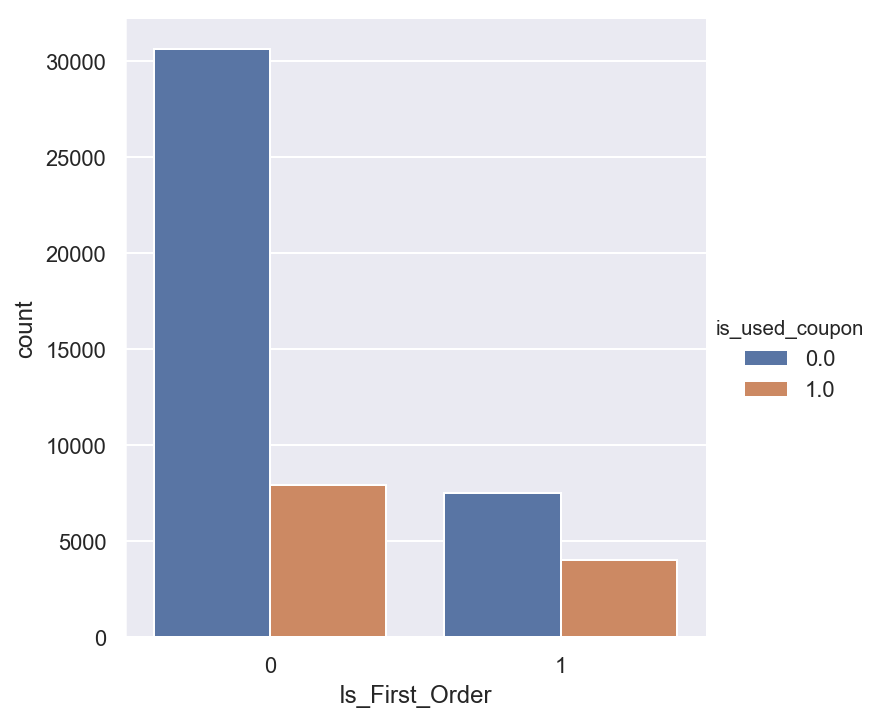

In [ ]:
sns.catplot(x='Is_First_Order',hue='is_used_coupon',kind='count',data=df)

## Distribution by Multiple Purcahse and Revenue

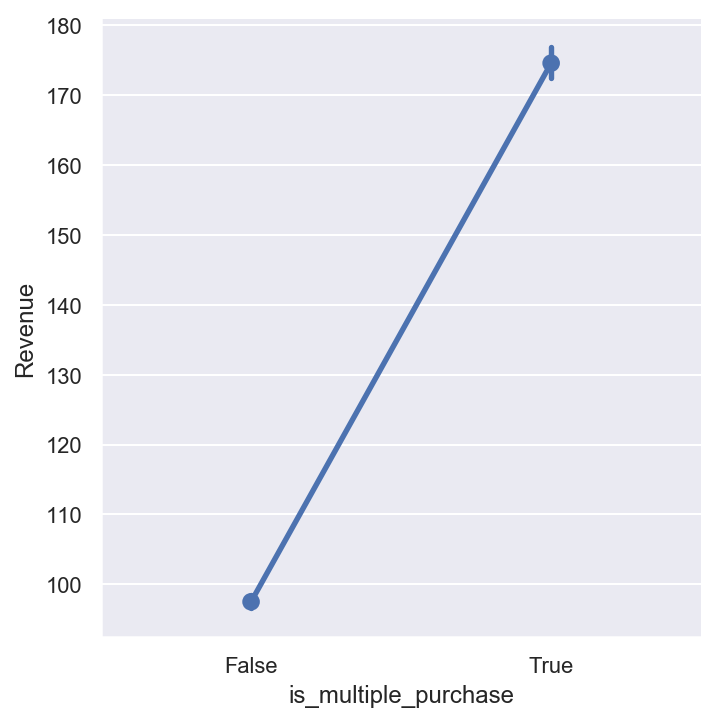

In [ ]:
sns.catplot(x='is_multiple_purchase',y='Revenue',kind='point',data=df)

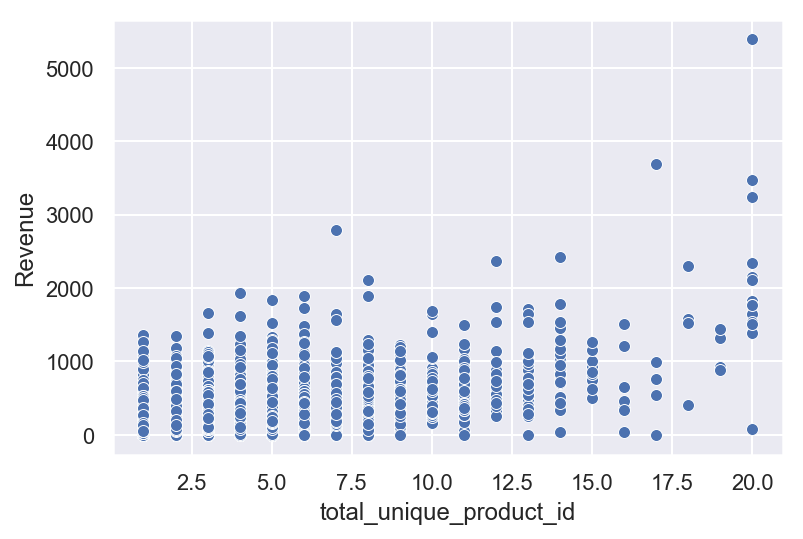

In [ ]:
sns.scatterplot(x='total_unique_product_id',y='Revenue',data=df)

## data preprocessing and column selection for clustering analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49984 entries, 2017-10-01 00:00:00 to 2017-10-21 23:59:00
Data columns (total 24 columns):
timestamp                    49984 non-null datetime64[ns]
user ID                      49984 non-null int64
ip_address                   49984 non-null object
Product_Name                 49984 non-null object
Product_ID                   49984 non-null object
Is_First_Order               49984 non-null int8
User_Gender                  48810 non-null object
Payment_Type                 49984 non-null object
Number_of_Products           49984 non-null object
Order_Coupon_Code            11879 non-null object
City                         49647 non-null object
Country_Province             45804 non-null object
User_Birthday                22709 non-null object
Country                      49984 non-null object
Revenue                      49984 non-null float32
total_product                49984 non-null int64
total_unique_product         49984 

In [ ]:
cols=['ip_address','Is_First_Order','User_Gender','Payment_Type','Country','Revenue','total_unique_product','is_used_coupon','is_multiple_purchase']
le_col=['ip_address','Is_First_Order','User_Gender','Payment_Type','Country']

In [ ]:
data=df[cols]

In [ ]:
data[le_col]=data[le_col].astype('category')

In [ ]:
for col in le_col:
    data[col]=data[col].cat.codes

In [ ]:
data.head()

ip_address  Is_First_Order  User_Gender  Payment_Type  \
timestamp                                                                    
2017-10-01 00:00:00        2247               1            0             2   
2017-10-01 00:02:00       18140               0            0             3   
2017-10-01 00:04:00       18004               0            1             1   
2017-10-01 00:06:00       10550               0            0             1   
2017-10-01 00:07:00       34591               0            0             2   

                     Country     Revenue  total_unique_product  \
timestamp                                                        
2017-10-01 00:00:00        0   45.450001                     1   
2017-10-01 00:02:00        0  168.070007                     4   
2017-10-01 00:04:00        1   54.500000                     1   
2017-10-01 00:06:00        1  118.139999                     1   
2017-10-01 00:07:00        0  140.000000                     1   

                     is_used_coupon  is_multiple_purchase  
timestamp                                                  
2017-10-01 00:00:00             1.0                 False  
2017-10-01 00:02:00             0.0                  True  
2017-10-01 00:04:00             0.0                 False  
2017-10-01 00:06:00             0.0                 False  
2017-10-01 00:07:00             0.0                 False

## k means clustering

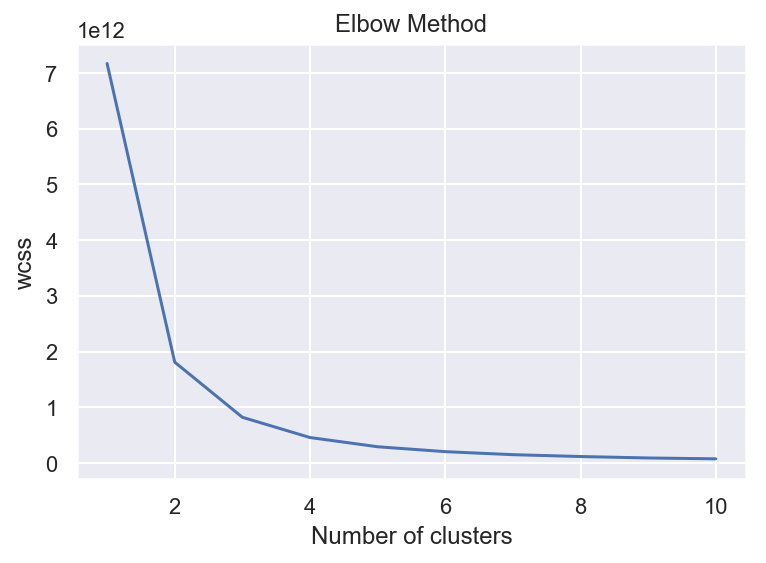

Wall time: 42.6 s


In [ ]:
%%time
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
X=data[cols].values
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

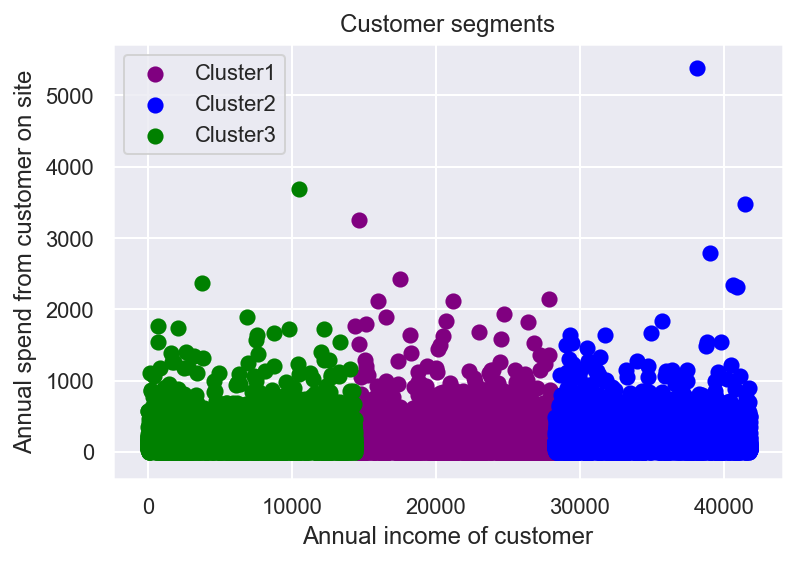

In [ ]:
##Fitting kmeans to the dataset with k=3
km4=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
#Visualizing the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,5],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,5],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,5],s=50, c='green',label='Cluster3')
# plt.scatter(X[y_means==1,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
# plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
rndperm = np.random.permutation(data.shape[0])

Explained variation per principal component: [9.99877633e-01 1.22344228e-04 1.21387210e-08 5.27282508e-09
 1.49946868e-09 1.17020021e-09 9.74232700e-10 8.75598799e-10
 3.64642961e-10]


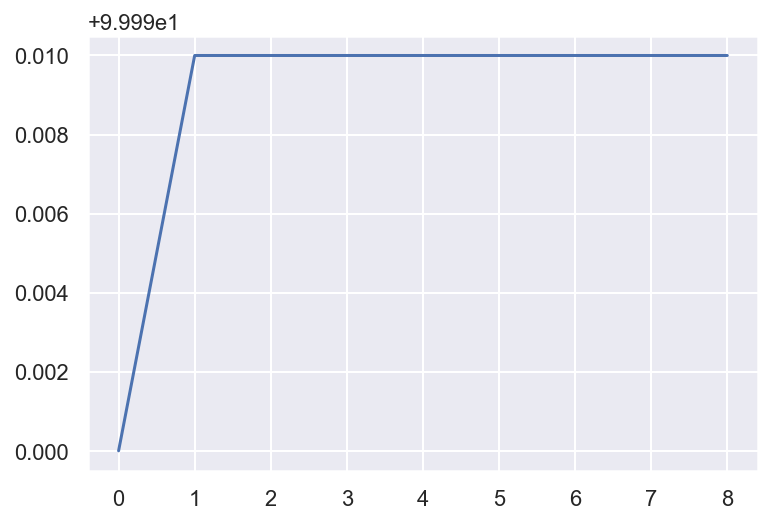

In [ ]:
# pca = PCA(n_components=3)
pca = PCA()
pca_result = pca.fit_transform(data[cols].values)
data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1] 
data['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

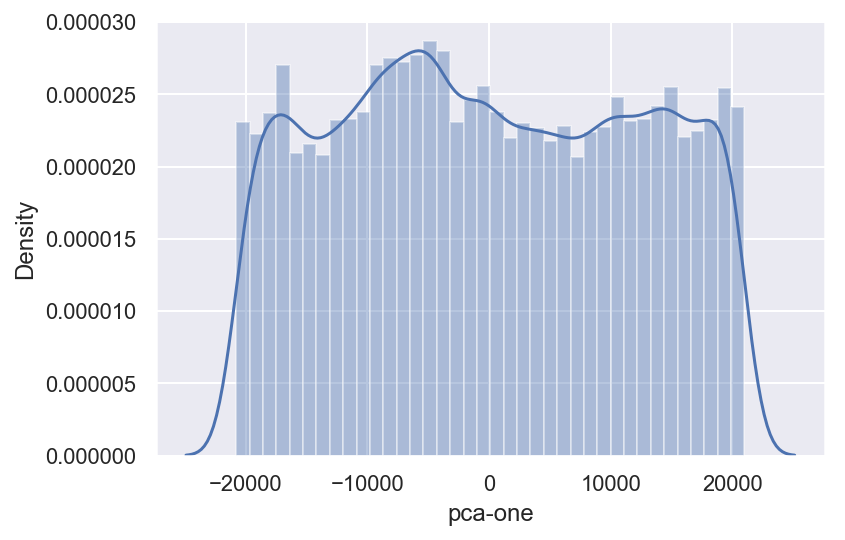

In [ ]:
sns.distplot(data['pca-one'])

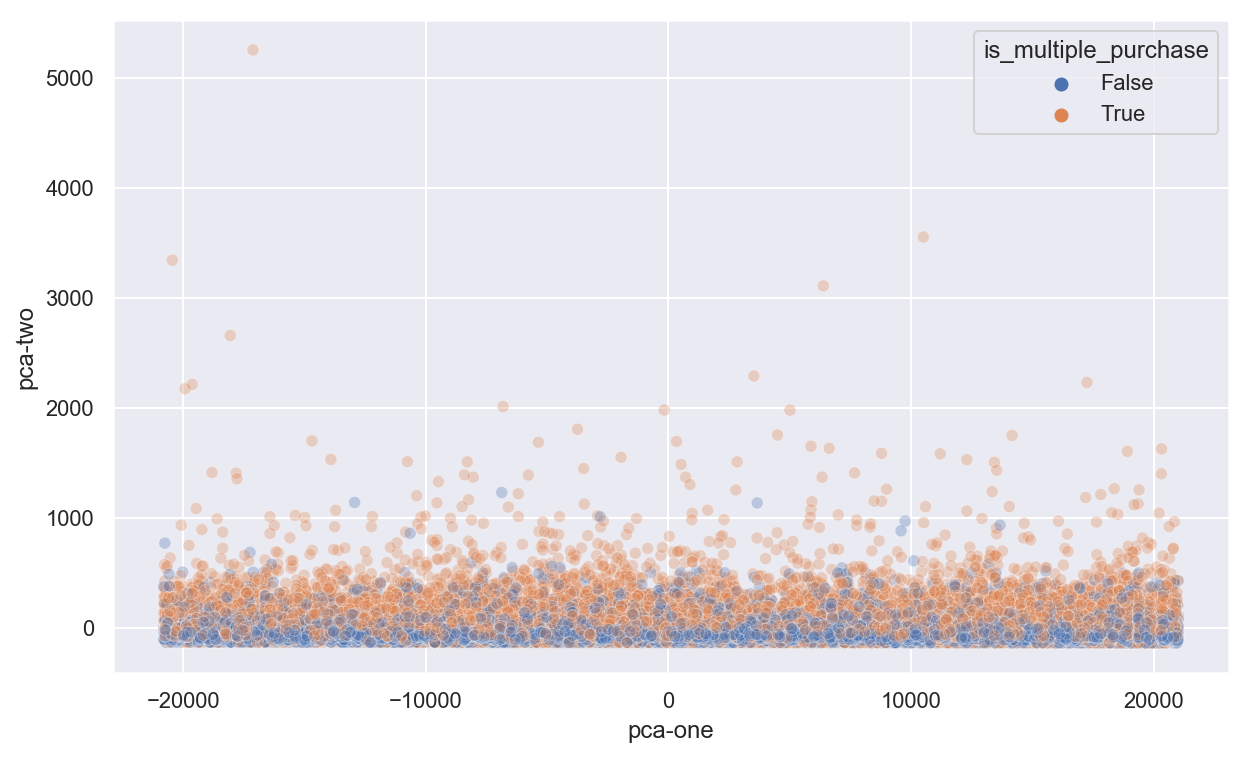

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="is_multiple_purchase",
#     palette=sns.color_palette("hls", 3),
    data=data,
#     data=data.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

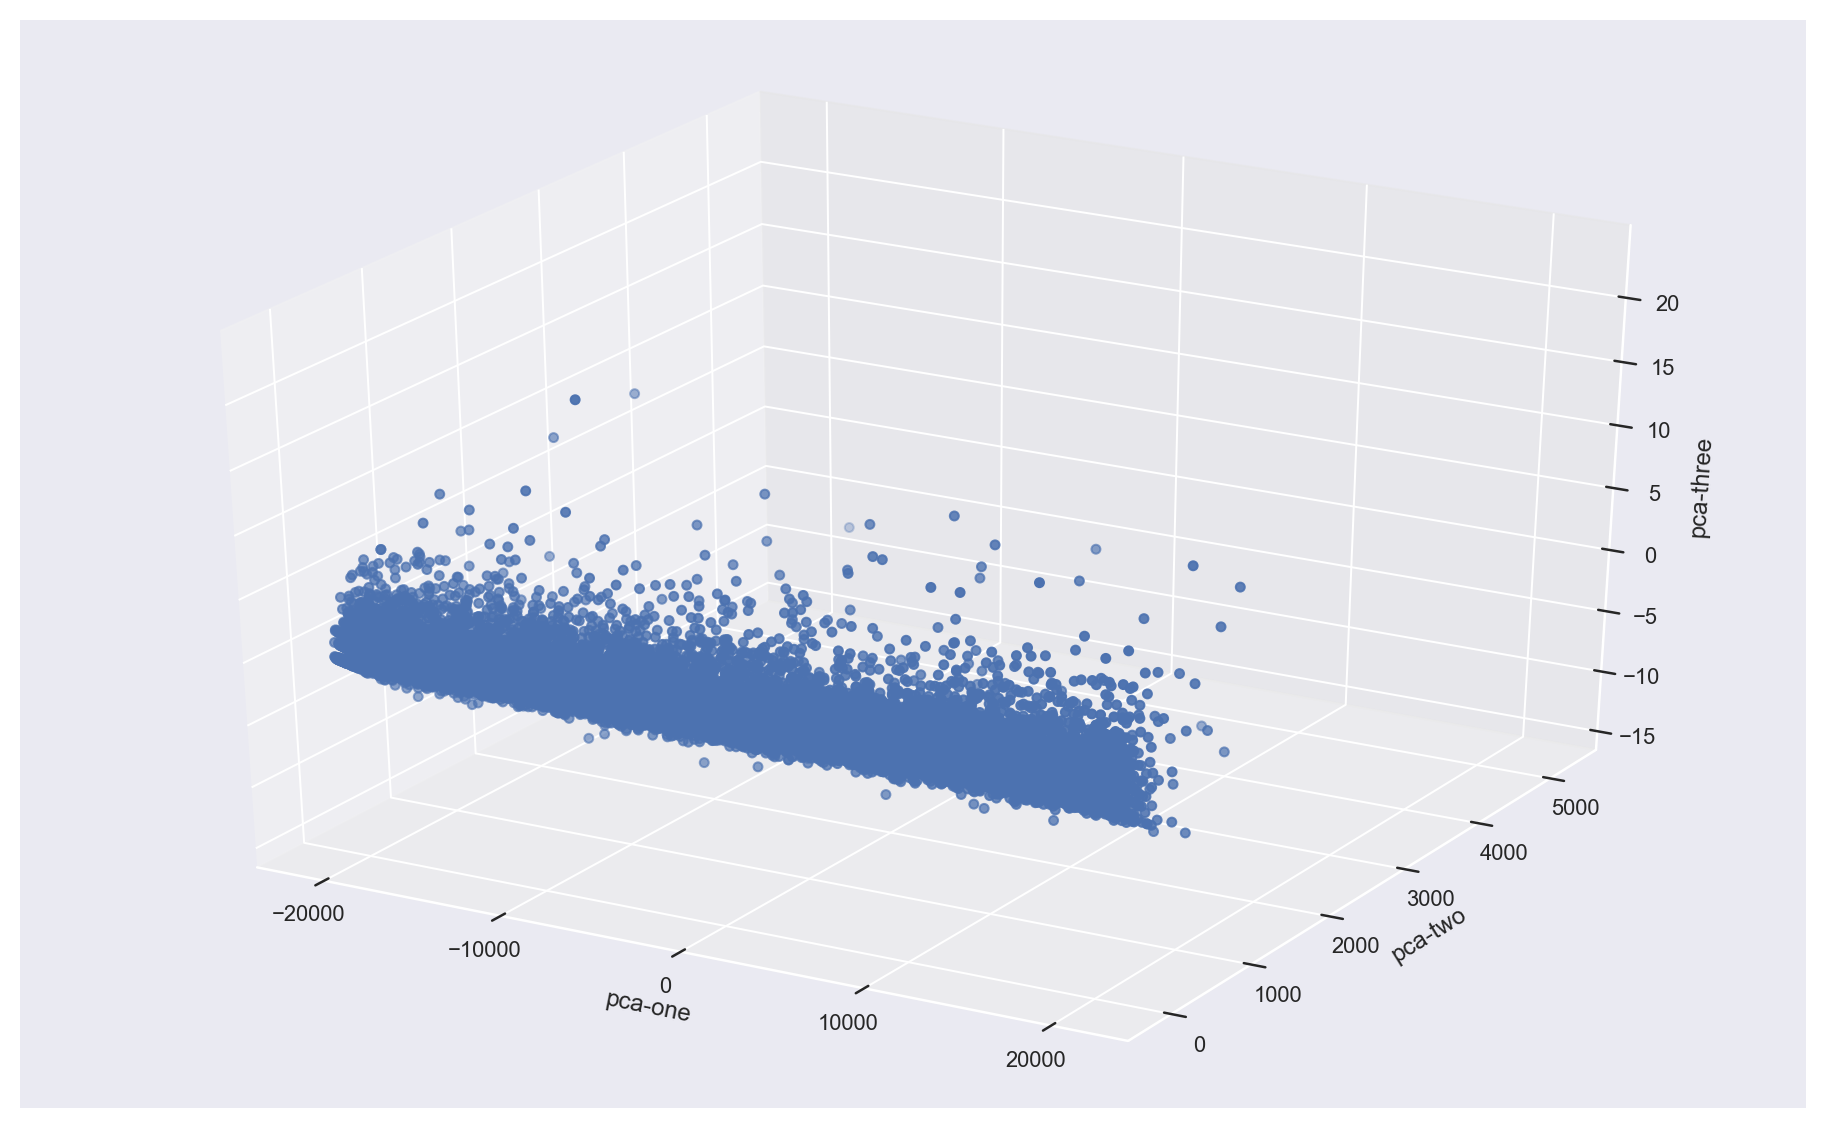

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=data["pca-one"], 
    ys=data["pca-two"], 
    zs=data["pca-three"], 
#     c=data.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [ ]:
data.head()

ip_address  Is_First_Order  User_Gender  Payment_Type  \
timestamp                                                                    
2017-10-01 00:00:00        2247               1            0             2   
2017-10-01 00:02:00       18140               0            0             3   
2017-10-01 00:04:00       18004               0            1             1   
2017-10-01 00:06:00       10550               0            0             1   
2017-10-01 00:07:00       34591               0            0             2   

                     Country     Revenue  total_unique_product  \
timestamp                                                        
2017-10-01 00:00:00        0   45.450001                     1   
2017-10-01 00:02:00        0  168.070007                     4   
2017-10-01 00:04:00        1   54.500000                     1   
2017-10-01 00:06:00        1  118.139999                     1   
2017-10-01 00:07:00        0  140.000000                     1   

                     is_used_coupon  is_multiple_purchase       pca-one  \
timestamp                                                                 
2017-10-01 00:00:00             1.0                 False  18764.037694   
2017-10-01 00:02:00             0.0                  True   2871.061813   
2017-10-01 00:04:00             0.0                 False   3007.039749   
2017-10-01 00:06:00             0.0                 False  10461.051972   
2017-10-01 00:07:00             0.0                 False -13579.943327   

                       pca-two  pca-three  
timestamp                                  
2017-10-01 00:00:00 -92.240055  -0.397517  
2017-10-01 00:02:00  33.486813   1.822146  
2017-10-01 00:04:00 -80.129619  -0.464533  
2017-10-01 00:06:00 -17.939190  -0.912148  
2017-10-01 00:07:00   8.590845  -1.136125

## T - SNE

In [ ]:
%%time
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data[cols])
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 49984 samples in 0.194s...
[t-SNE] Computed neighbors for 49984 samples in 3.618s...
[t-SNE] Computed conditional probabilities for sample 1000 / 49984
[t-SNE] Computed conditional probabilities for sample 2000 / 49984
[t-SNE] Computed conditional probabilities for sample 3000 / 49984
[t-SNE] Computed conditional probabilities for sample 4000 / 49984
[t-SNE] Computed conditional probabilities for sample 5000 / 49984
[t-SNE] Computed conditional probabilities for sample 6000 / 49984
[t-SNE] Computed conditional probabilities for sample 7000 / 49984
[t-SNE] Computed conditional probabilities for sample 8000 / 49984
[t-SNE] Computed conditional probabilities for sample 9000 / 49984
[t-SNE] Computed conditional probabilities for sample 10000 / 49984
[t-SNE] Computed conditional probabilities for sample 11000 / 49984
[t-SNE] Computed conditional probabilities for sample 12000 / 49984
[t-SNE] Computed conditional probabilities for sa

In [ ]:
# import pickle
# file = open("miq_tsne_result.pickle","wb")
# pickle.dump([tsne,tsne_results], file)
# file.close()

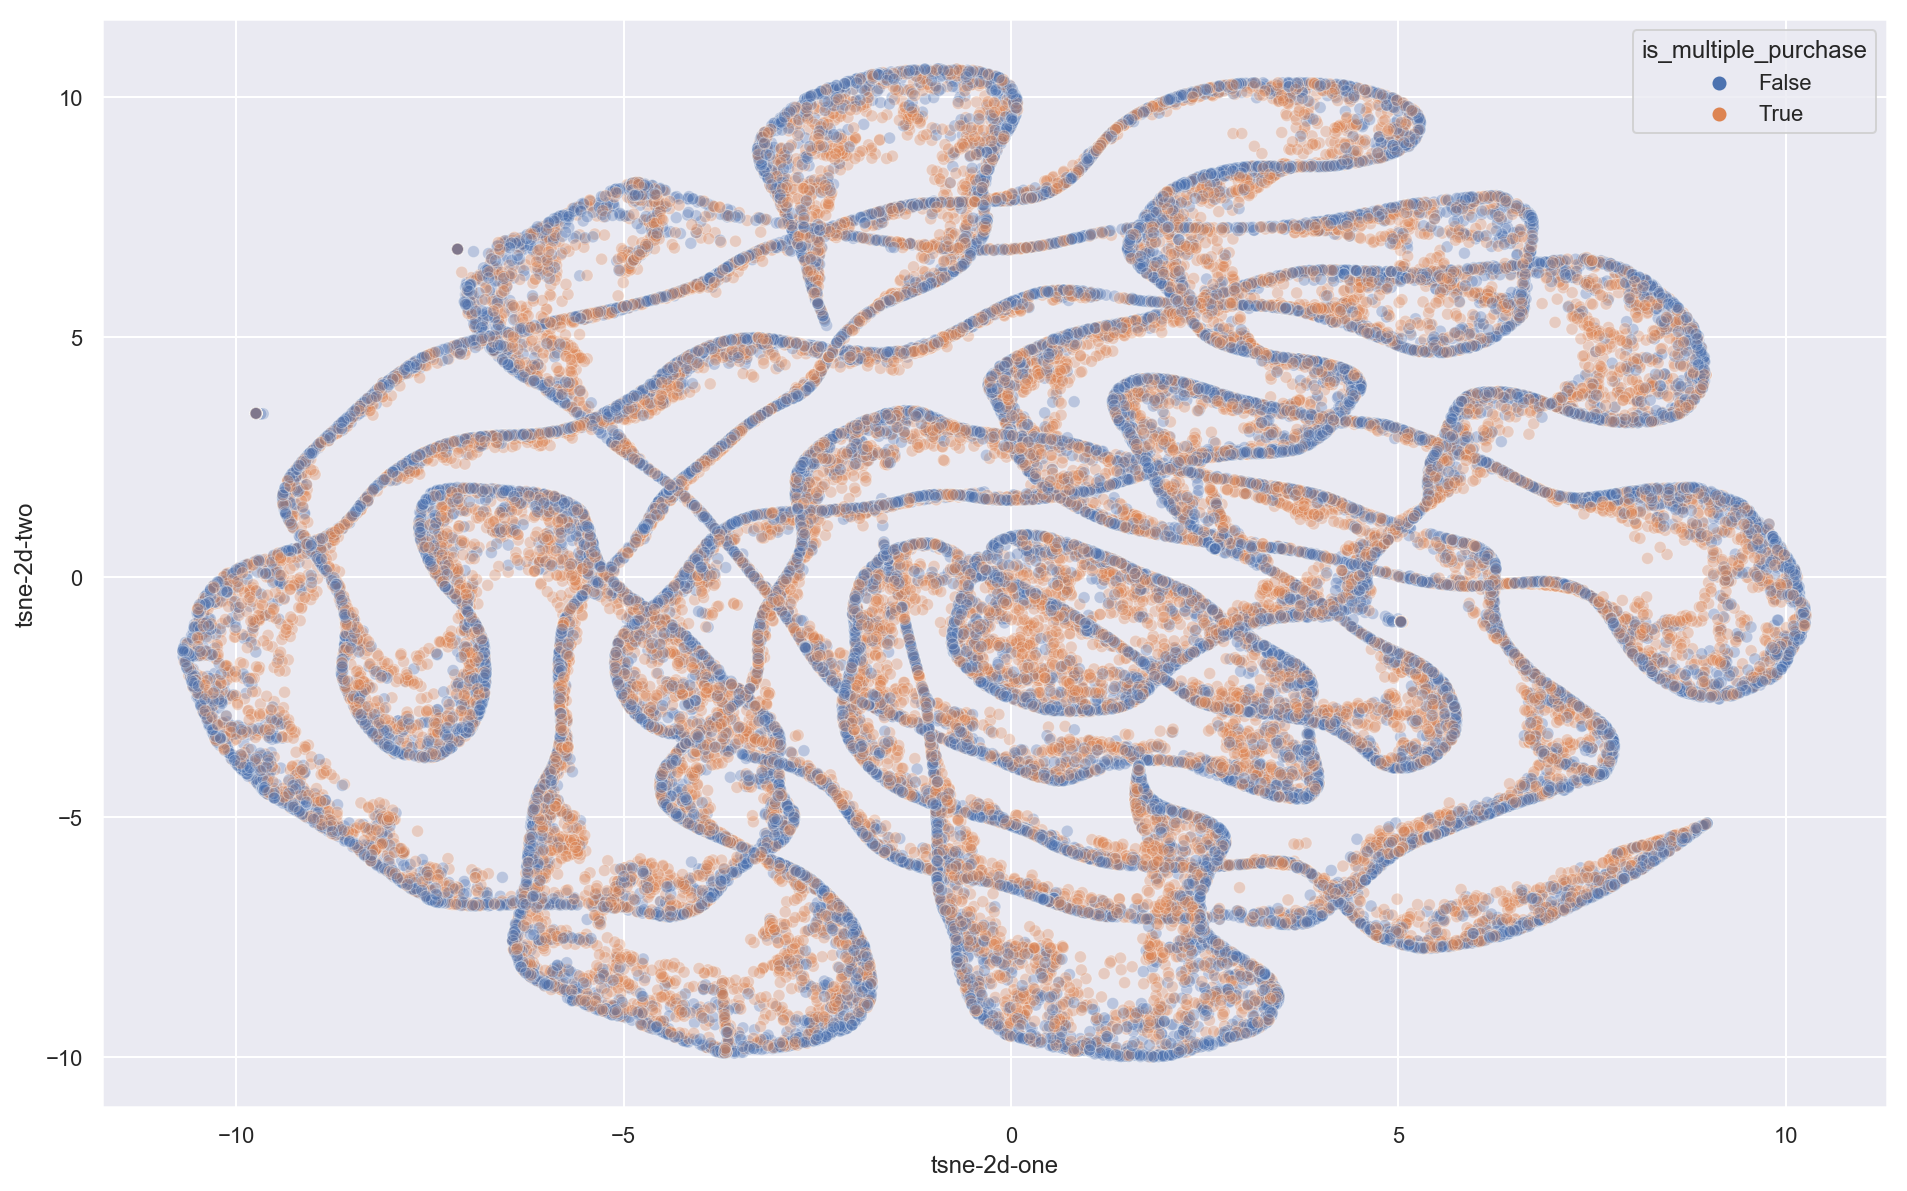

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="is_multiple_purchase",
#     palette=sns.color_palette("hls", 10),
    data=data,
    legend="full",
    alpha=0.3
)